# EDA - Lending Club Case Study
## By Venkata Sreeleela Sappa
### Objective:
**The objective of this case study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.So that,the company can utilise this knowledge for its portfolio and risk assessment.**

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Option to display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
## Loading the data in new DataFrame
df = pd.read_csv('loan.csv')

# 1.Data Understanding

In [3]:
##display First 5 Rows of df
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### 1.1 Business Understanding :
#### 1.1.1 Lending Club :
LendingClub is the world's largest peer-to-peer lending platform.It specialises in lending various types of loans to urban customers.It is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

#### 1.1.2 Objective of the EDA : 
To analyze the data provided as part of the case study and be able to identify the key driving factors for loan default. 
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

#### 1.1.3 Important Business Terminology : 
1. Delinquency: Delinquency means that the borrower is behind on payments. Once a borrower is delinquent for a certain period of time (usually nine months for federal loans), the lender will declare the loan to be in default. The entire loan balance will become due at that time.
2. Charge-off : A charge-off means a lender or creditor has written the account off as a loss, and the account is closed to future charges.
3. Revolving credit: Revolving credit is a credit line that remains available even as you pay the balance. Borrowers can access credit up to a certain amount and then have ongoing access to that amount of credit.
4. Revolving line utilization rate: The amount of credit the borrower is using relative to all available revolving credit.
### 1.2 Data Set Understanding :
#### Initial understanding of the data by looking at the dataset : 
1. We have only approved load data, rejected loan information is not provided.
2. We see that we have a data frame with **39717  entries and 111 columns**.
3. We have in information of loans issued from **2007 to 2011** .
4. The most critical feature in our analysis would be **loan_status**. We see that we have info of **Fully Paid(Closed), Charged Off(Defaulted) and Current(in progress)** loans
5. On the initial look, its clearly visible that a considerable number of columns are completely null. 
6. We have **1 unique loan entry per employee** , as we can see all entries in member_id are unique.
7. Data set has a good number of borrower's behaviour related features like grade, annual income,employment length ,title ,sub grade,Number of derogatory public records, Number of public record bankruptcies,zip code, state etc.,
8. There is information on critical loan information like loan amount , revolving line utilization rate, loan issued date, installments , interest rate etc.,
9. We can see some numeric variables need standardization like removal of percentages , text etc., 



# 2. Data Cleaning

In [6]:
# Calculate the sum of null values in each column
null_counts_perc = df.isna().sum()/39717 * 100

# Sort the null value counts in descending order
null_counts_perc_sorted = null_counts_perc.sort_values(ascending=False)

# Print the null value counts in descending order
print(null_counts_perc_sorted)

verification_status_joint        100.00
annual_inc_joint                 100.00
mo_sin_old_rev_tl_op             100.00
mo_sin_old_il_acct               100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_coll_amt                     100.00


### 2.1. It is observed that there are many columns which are empty. Removing those columns.

In [7]:
df.dropna(axis = 1, how = 'all', inplace = True)

In [8]:
## After removing the columns which are empty let us check again the counts of Null columns present.
df.isnull().all(axis=0).sum()

0

In [9]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [10]:
df.shape

(39717, 57)

### 2.2. Finding if there are any other columns which are mostly empty by calculating the percentage of Null Values

In [11]:
#check null column count among the remaning rows 
null_columns_count=df.isna().sum(axis=0)/39717 * 100
print(null_columns_count[null_columns_count>0].sort_values(ascending=False))

next_pymnt_d                 97.13
mths_since_last_record       92.99
mths_since_last_delinq       64.66
desc                         32.58
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64


### 2.3. Removing the columns which have more than 60% Null values present

In [12]:
columns_drop_list = ["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]
df.drop(labels = columns_drop_list, axis = 1, inplace=True)

In [13]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [14]:
df.shape

(39717, 54)

### 2.4. Verifying the uniqueness of data in the remaining columns.

In [15]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

### 2.5. There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

#### These columns are:

1. id : is a random number given to the loan, does not contribute to analysis 
2. member_id : is a random number given to the member, does not contribute to analysis 
3. pymnt_plan :value for entire dataset is 'n', therefore can be removed. 
4. url : is a URL for LC page for corresponding to each memberid, nothing to do with loan default. 
5. zip_code : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis 
6. initial_list_status : value for entire dataset is 'f' out of the possible values, therefore can be removed. 
7. policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed. 
8. application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed. 
9. acc_now_delinq : value for entire dataset is '0', therefore can be removed. 
10. delinq_amnt : value for entire dataset is '0', therefore can be removed. 
11. funded_amnt : value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity. 
12. funded_amnt_inv : value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
13. collections_12_mths_ex_med : Value of entire data is 0 or NA. removing it as not useful for analysis.
14. chargeoff_within_12_mths : Value of entire data is 0 or NA. removing it as not useful for analysis.
15. tax_liens : Value of entire data is 0 or NA. removing it as not useful for analysis.

#### Dropping the above columns from the df dataframe.

In [16]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
df.drop(columns_tobe_dropped, axis=1,inplace = True)

In [17]:
df.shape

(39717, 39)

In [18]:
#check null column count among the remaning rows 
null_columns_count=df.isna().sum(axis=0)/39717 * 100
print(null_columns_count[null_columns_count>0].sort_values(ascending=False))

desc                   32.58
emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
last_pymnt_d            0.18
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
dtype: float64


### 2.6. Removing the *desc* column as an equivalent short and concise information is present in the purpose and title column of the data.

In [19]:
df.drop('desc',axis=1,inplace = True)

In [20]:
null_cols = df[['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies']]

In [21]:
#Getting the count of null columns left
null_cols.nunique().sort_values()

pub_rec_bankruptcies        3
emp_length                 11
last_pymnt_d              101
last_credit_pull_d        106
revol_util               1089
title                   19615
emp_title               28820
dtype: int64

### 2.7. Further cleaning these null columns:
1. emp_title : too many unique values to be used for analysis. Can be removed
2. title : too many unique values to be used for analysis. Can be removed
3. last_pymnt_d : Last month payment was received .Doesn't correlate with loan defaulting. Can be removed.
4. last_credit_pull_d : The most recent month LC pulled credit for this loan .Doesn't correlate with loan defaulting. Can be removed.

#### Removing these columns

In [22]:
cols_list = ['emp_title','title','last_pymnt_d','last_credit_pull_d']

df.drop(cols_list, axis=1,inplace = True)

In [23]:
df.shape

(39717, 34)

In [24]:
#check null column count among the remaining rows 
null_columns_count=df.isna().sum(axis=0)/39717 * 100
print(null_columns_count[null_columns_count>0].sort_values(ascending=False))

emp_length             2.71
pub_rec_bankruptcies   1.75
revol_util             0.13
dtype: float64


### 2.8. emp_length and pub_rec_bankruptcies   can be used as categorical variables with 11 and 3 unique values respectively. Replacing the nulls with mode for these columns
1. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
2. pub_rec_bankruptcies : Number of public record bankruptcies

In [25]:
mode_emp_length = df.emp_length.mode()[0]
mode_pub_rec_bankruptcies= df.pub_rec_bankruptcies.mode()[0]
print('mode_emp_length:',mode_emp_length,' mode_pub_rec_bankruptcies:',mode_pub_rec_bankruptcies)

mode_emp_length: 10+ years  mode_pub_rec_bankruptcies: 0.0


In [26]:
df.emp_length.fillna(mode_emp_length,inplace  = True)
df.pub_rec_bankruptcies.fillna(mode_pub_rec_bankruptcies, inplace = True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.00


### 2.9. revol_util is also a good metric for analysis. This is a percentage column. The nulls are only 0.13 % and can be replaced with the median. However , we need to truncate the '%' sign and convert it to float, before we can replace with median.
1. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [27]:
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.00


In [29]:
revol_util_median = df.revol_util.median()
print('revol_util_median:',revol_util_median)

revol_util_median: 49.3


In [30]:
df.revol_util.fillna(revol_util_median, inplace = True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.00


In [31]:
#double checking that there are no values left with Nulls in the data set
null_columns_count=df.isna().sum(axis=0)/39717 * 100
print(null_columns_count[null_columns_count>0].sort_values(ascending=False))

Series([], dtype: float64)


## 3.Standardizing the data

### 3.1. int_rate is a percentage column, We can get rid of the percentage sign and save it as float
* int_rate : Interest Rate on the loan

In [32]:
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00
4,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.00


### 3.2. Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."
* loan_status : Current status of the loan(Fully Paid= Closed, Charged Off = Defaulted and Current= In Progress)

In [33]:
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df.shape

(38577, 34)

### 3.3. After removng Current entries , out_prncp_inv,out_prncp are both only 0.removing them

In [34]:
df.drop(['out_prncp_inv','out_prncp'], axis=1,inplace = True)

### 3.4. emp_length has values appended with text  'years' ,'<' etc., we can change this to usable int 
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [35]:
df.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [36]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [37]:
df = df.replace({"emp_length": emp_length_dict })

In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00
5,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.00


### 3.5. term column has text 'months' appended. Removing this.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.

In [39]:
df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [40]:
df['term'] = df.term.apply(lambda x: x.split()[0])

In [41]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.00


In [42]:
df.shape

(38577, 32)

### 3.6. Date time columns formatting :
Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
These columns are:
1. issue_d : The date on which the loan was funded
2. earliest_cr_line : The date om which  the borrower's earliest reported credit line was opened.

In [43]:
datetime_colmns=['issue_d','earliest_cr_line']
df[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   issue_d           38577 non-null  object
 1   earliest_cr_line  38577 non-null  object
dtypes: object(2)
memory usage: 904.1+ KB


In [44]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issue_d           38577 non-null  datetime64[ns]
 1   earliest_cr_line  38577 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 904.1 KB


# 4.Derived Metrics for analysis

* issue_d: The date which the loan was funded .
#### Lets split the available date into month and year column.

In [45]:
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

In [46]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [47]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00,12,2011,1,1985
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00,12,2011,4,1999
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00,12,2011,11,2001
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00,12,2011,2,1996
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.00,12,2011,11,2004


# 5.Define Functions for reuse (plotting,summary)

In [48]:
# Creating plots

# Create a count plot vertically for an input list 

def count_plot_vertical(cols_vertical,rows,cols) :
    # Define the number of rows and columns in the matrix
    num_rows = rows
    num_cols = cols
    # Create a figure and axes for the matrix of countplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    # Flatten the axes matrix to make it easier to iterate over
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        # Select the corresponding column from the data for each countplot
        column = df[cols_vertical[i]]
        sns.countplot(x=column, data=df, ax=ax)
        ax.set_title(cols_vertical[i])
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

# Create a count plot horizontally for an input list 

def count_plot_horizontal(cols_horizontal,rows,cols) :
    # Define the number of rows and columns in the matrix
    num_rows = rows
    num_cols = cols
    # Create a figure and axes for the matrix of countplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    # Flatten the axes matrix to make it easier to iterate over
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        # Select the corresponding column from the data for each countplot
        column = df[cols_horizontal[i]]
        sns.countplot(y=column, data=df, ax=ax)
        ax.set_title(cols_horizontal[i])
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()
    
def numerical_summary(col_name) :
    # Numerical summary
    print('Numerical Summary: ')
    print('Min :',df[col_name].min())
    print('Max :',df[col_name].max())
    print('25% Data :',df[col_name].quantile(0.25))
    print('Mean:',df[col_name].mean())
    print('75% Data :',df[col_name].quantile(0.75))
    print('90% Data :', df[col_name].quantile(0.9))
    print('99% Data :', df[col_name].quantile(0.99))
    print('100% Data :', df[col_name].quantile(1))
    
def dist_plot_box_plot(col_name,title_dist,title_box,xlable,ylable) :
    # Distribution plot and outlier plot
    # Distribution plot
    plt.figure(figsize=(20,12))
    plt.subplot(2,2,1)
    viz = sns.distplot(df[col_name], color='black')
    viz.set_title(title_dist,fontsize=14,color='black')
    viz.set_ylabel(ylable,fontsize =10,color = 'black')
    viz.set_xlabel(xlable,fontsize =10,color = 'black') 
    # Outlier plot
    plt.subplot(2,2,2)
    viz = sns.boxplot(df[col_name], color='red',fliersize=2)
    viz.set_title(title_box,fontsize=14,color='black')
    viz.set_xlabel(xlable,fontsize =10,color = 'black')
    plt.show()

def contingency_tab(col1,col2) : 
    contingency_table = pd.crosstab(df[col1], df[col2])
    # Calculate row-wise percentages
    row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    print('contingency row percentages :',col1,'and',col2)
    print(row_percentages)


# 6.Univariate Analysis - Categorical Variables 

### We have identified the below categorical variables for analysis
1. term (36,60 months)
2. loan_status (Fully Paid,Charged off)
3. pub_rec_bankruptcies(0,1,2)
4. verification_status(Not Verified,Source Verified, Verified)
5. pub_rec(0,1,2,3,4)
6. home_ownership(MORTGAGE,NONE,OTHER,OWN,RENT)
7. grade(A,B,C,D,E,F,G)
8. inq_last_6mths(0,1,2,3,4,5,6,7,8)
9. delinq_2yrs(0,1,2,3,4,5,6,7,8,9,11)
10. emp_length(1,2,3,4,5,6,7,8,9,10)
11. purpose(credit_card, car, small_business, other, wedding,debt_consolidation, home_improvement, major_purchase,       medical, moving, vacation, house, renewable_energy,educational)
12. sub_grade(B2, C4, C5, C1, A4, E1, F2, B5, C3, B1, D1, A1, B3, B4, C2, D2, A3, A5, D5, A2, E4, D3, D4, F3, E3, F1, E5, G4, E2, G2, G1, F5, F4, G5, G3)


In [49]:
categorical_cols_vertical=['term','loan_status','pub_rec_bankruptcies','verification_status','pub_rec','home_ownership','grade','inq_last_6mths','delinq_2yrs','emp_length']
categorical_cols_horizontal=['purpose','sub_grade']

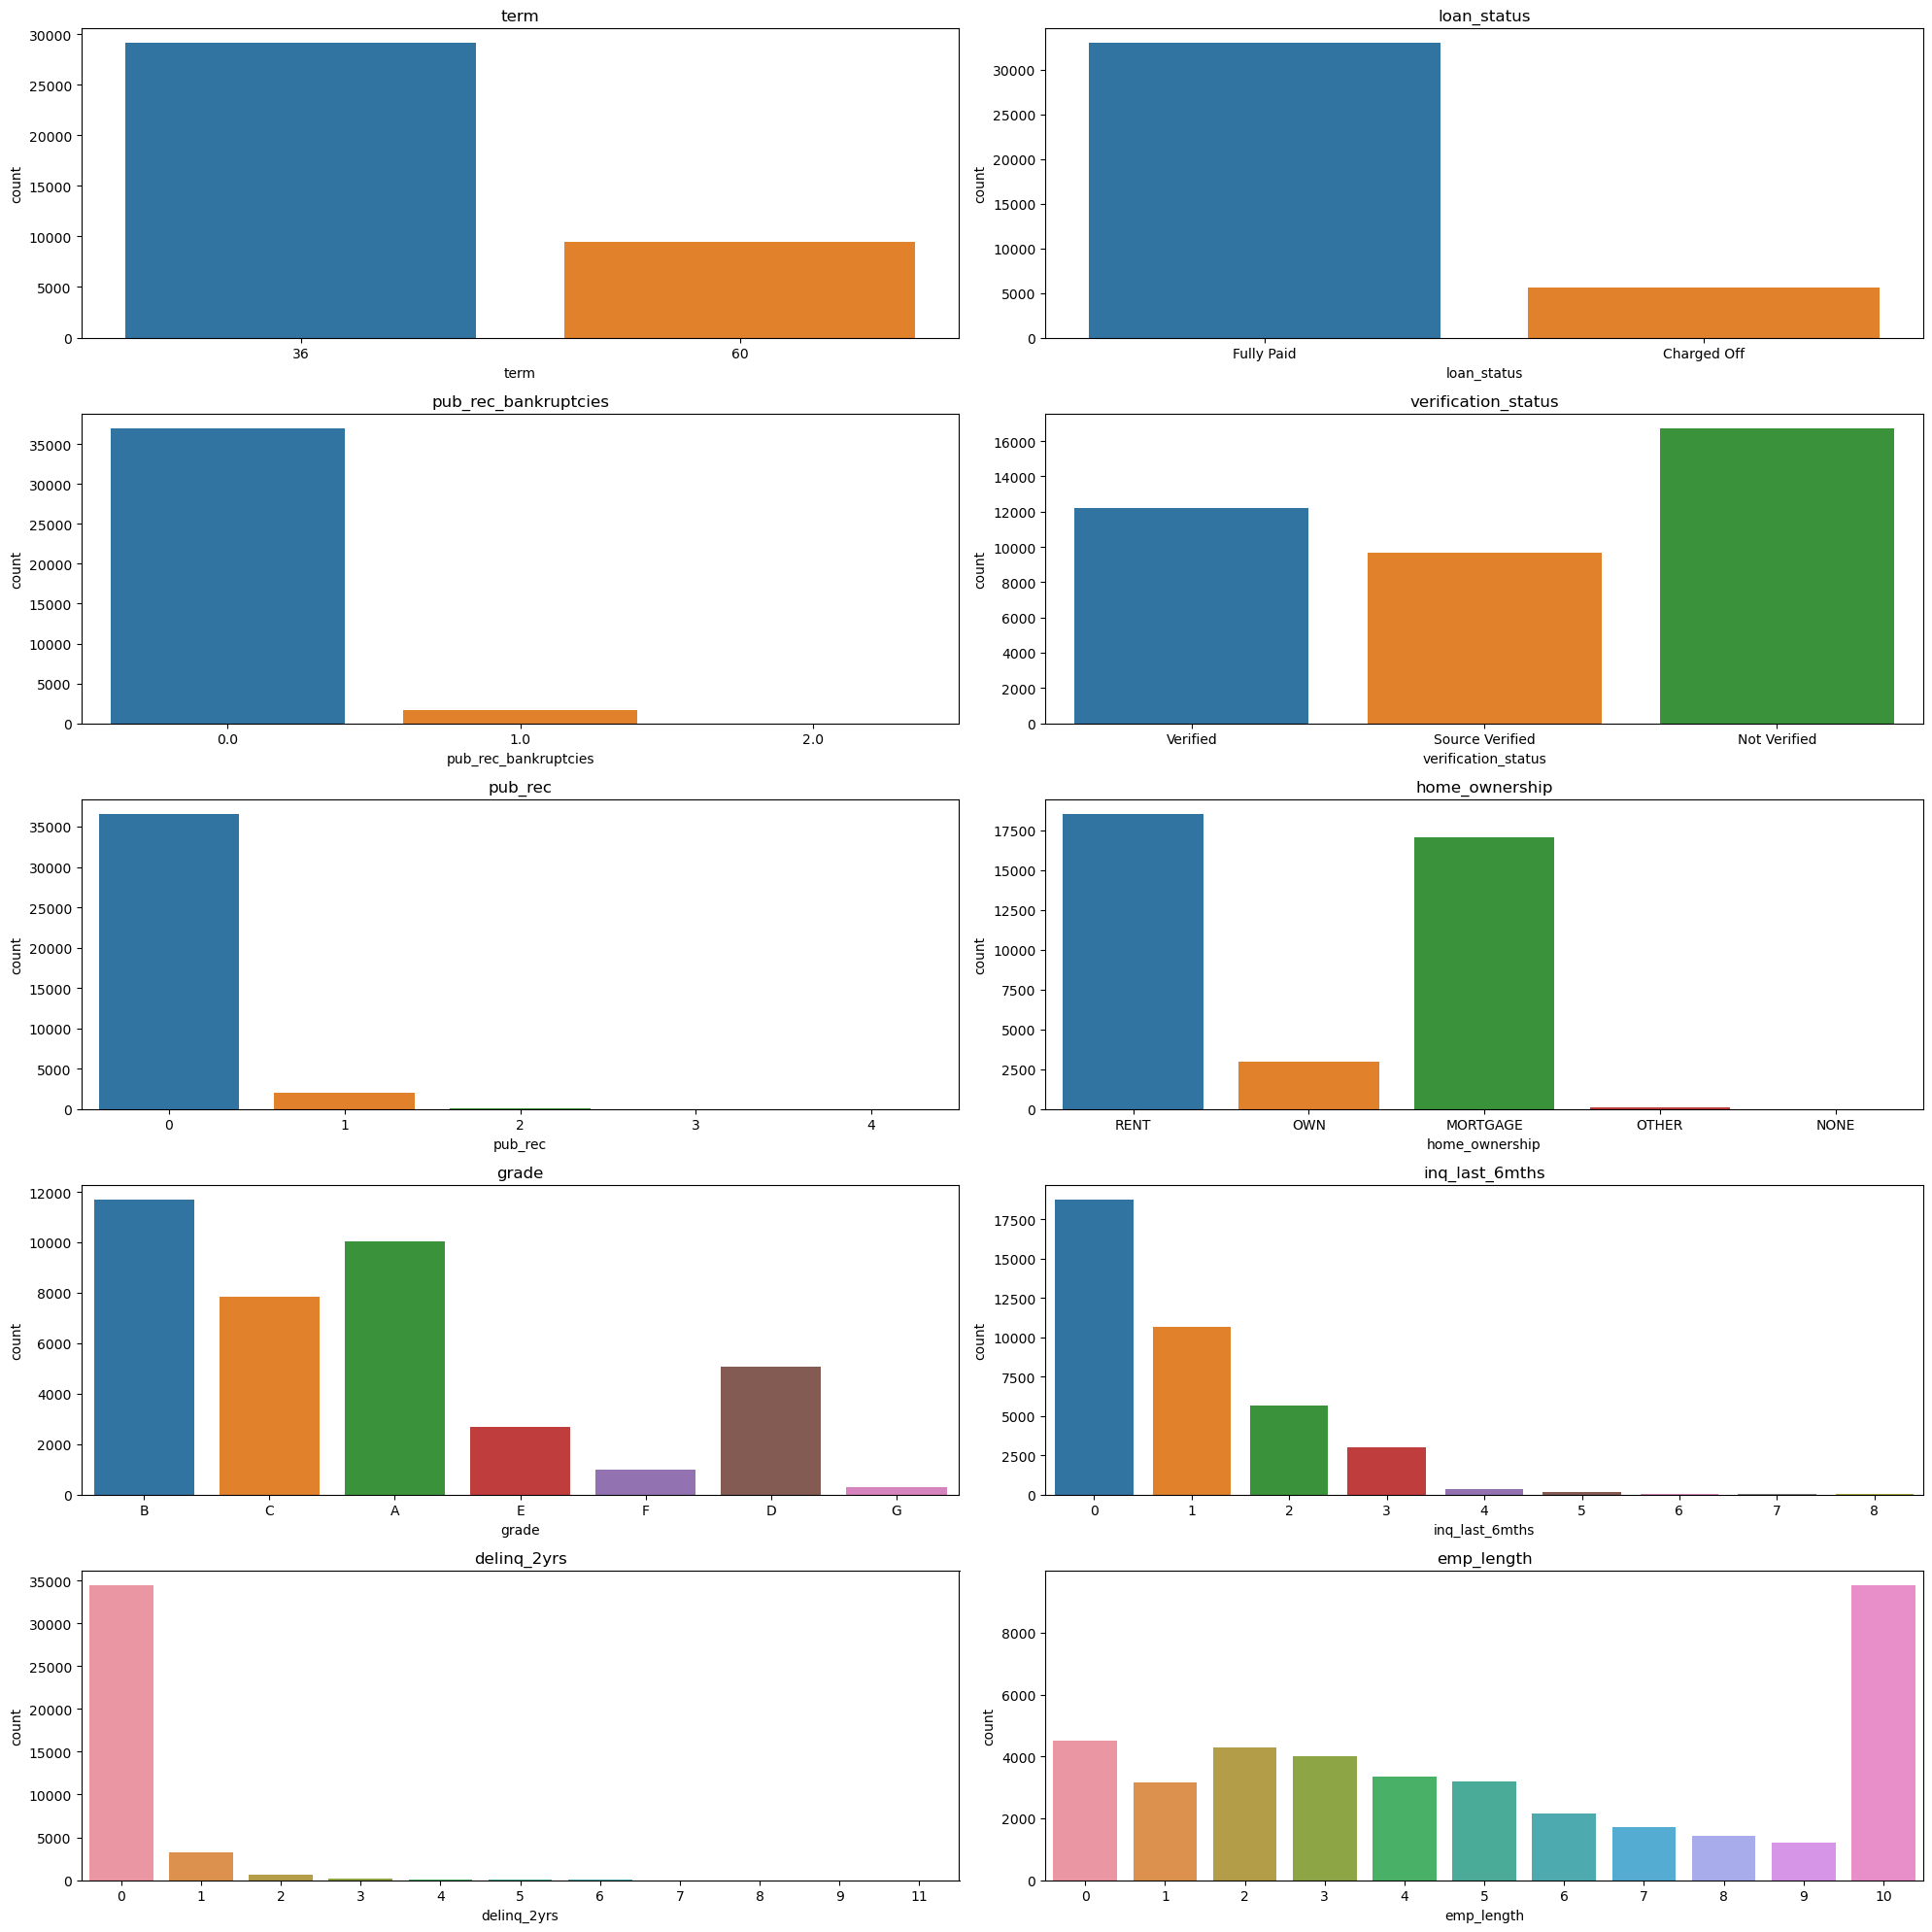

In [50]:
# Creating plots
count_plot_vertical(categorical_cols_vertical,5,2)

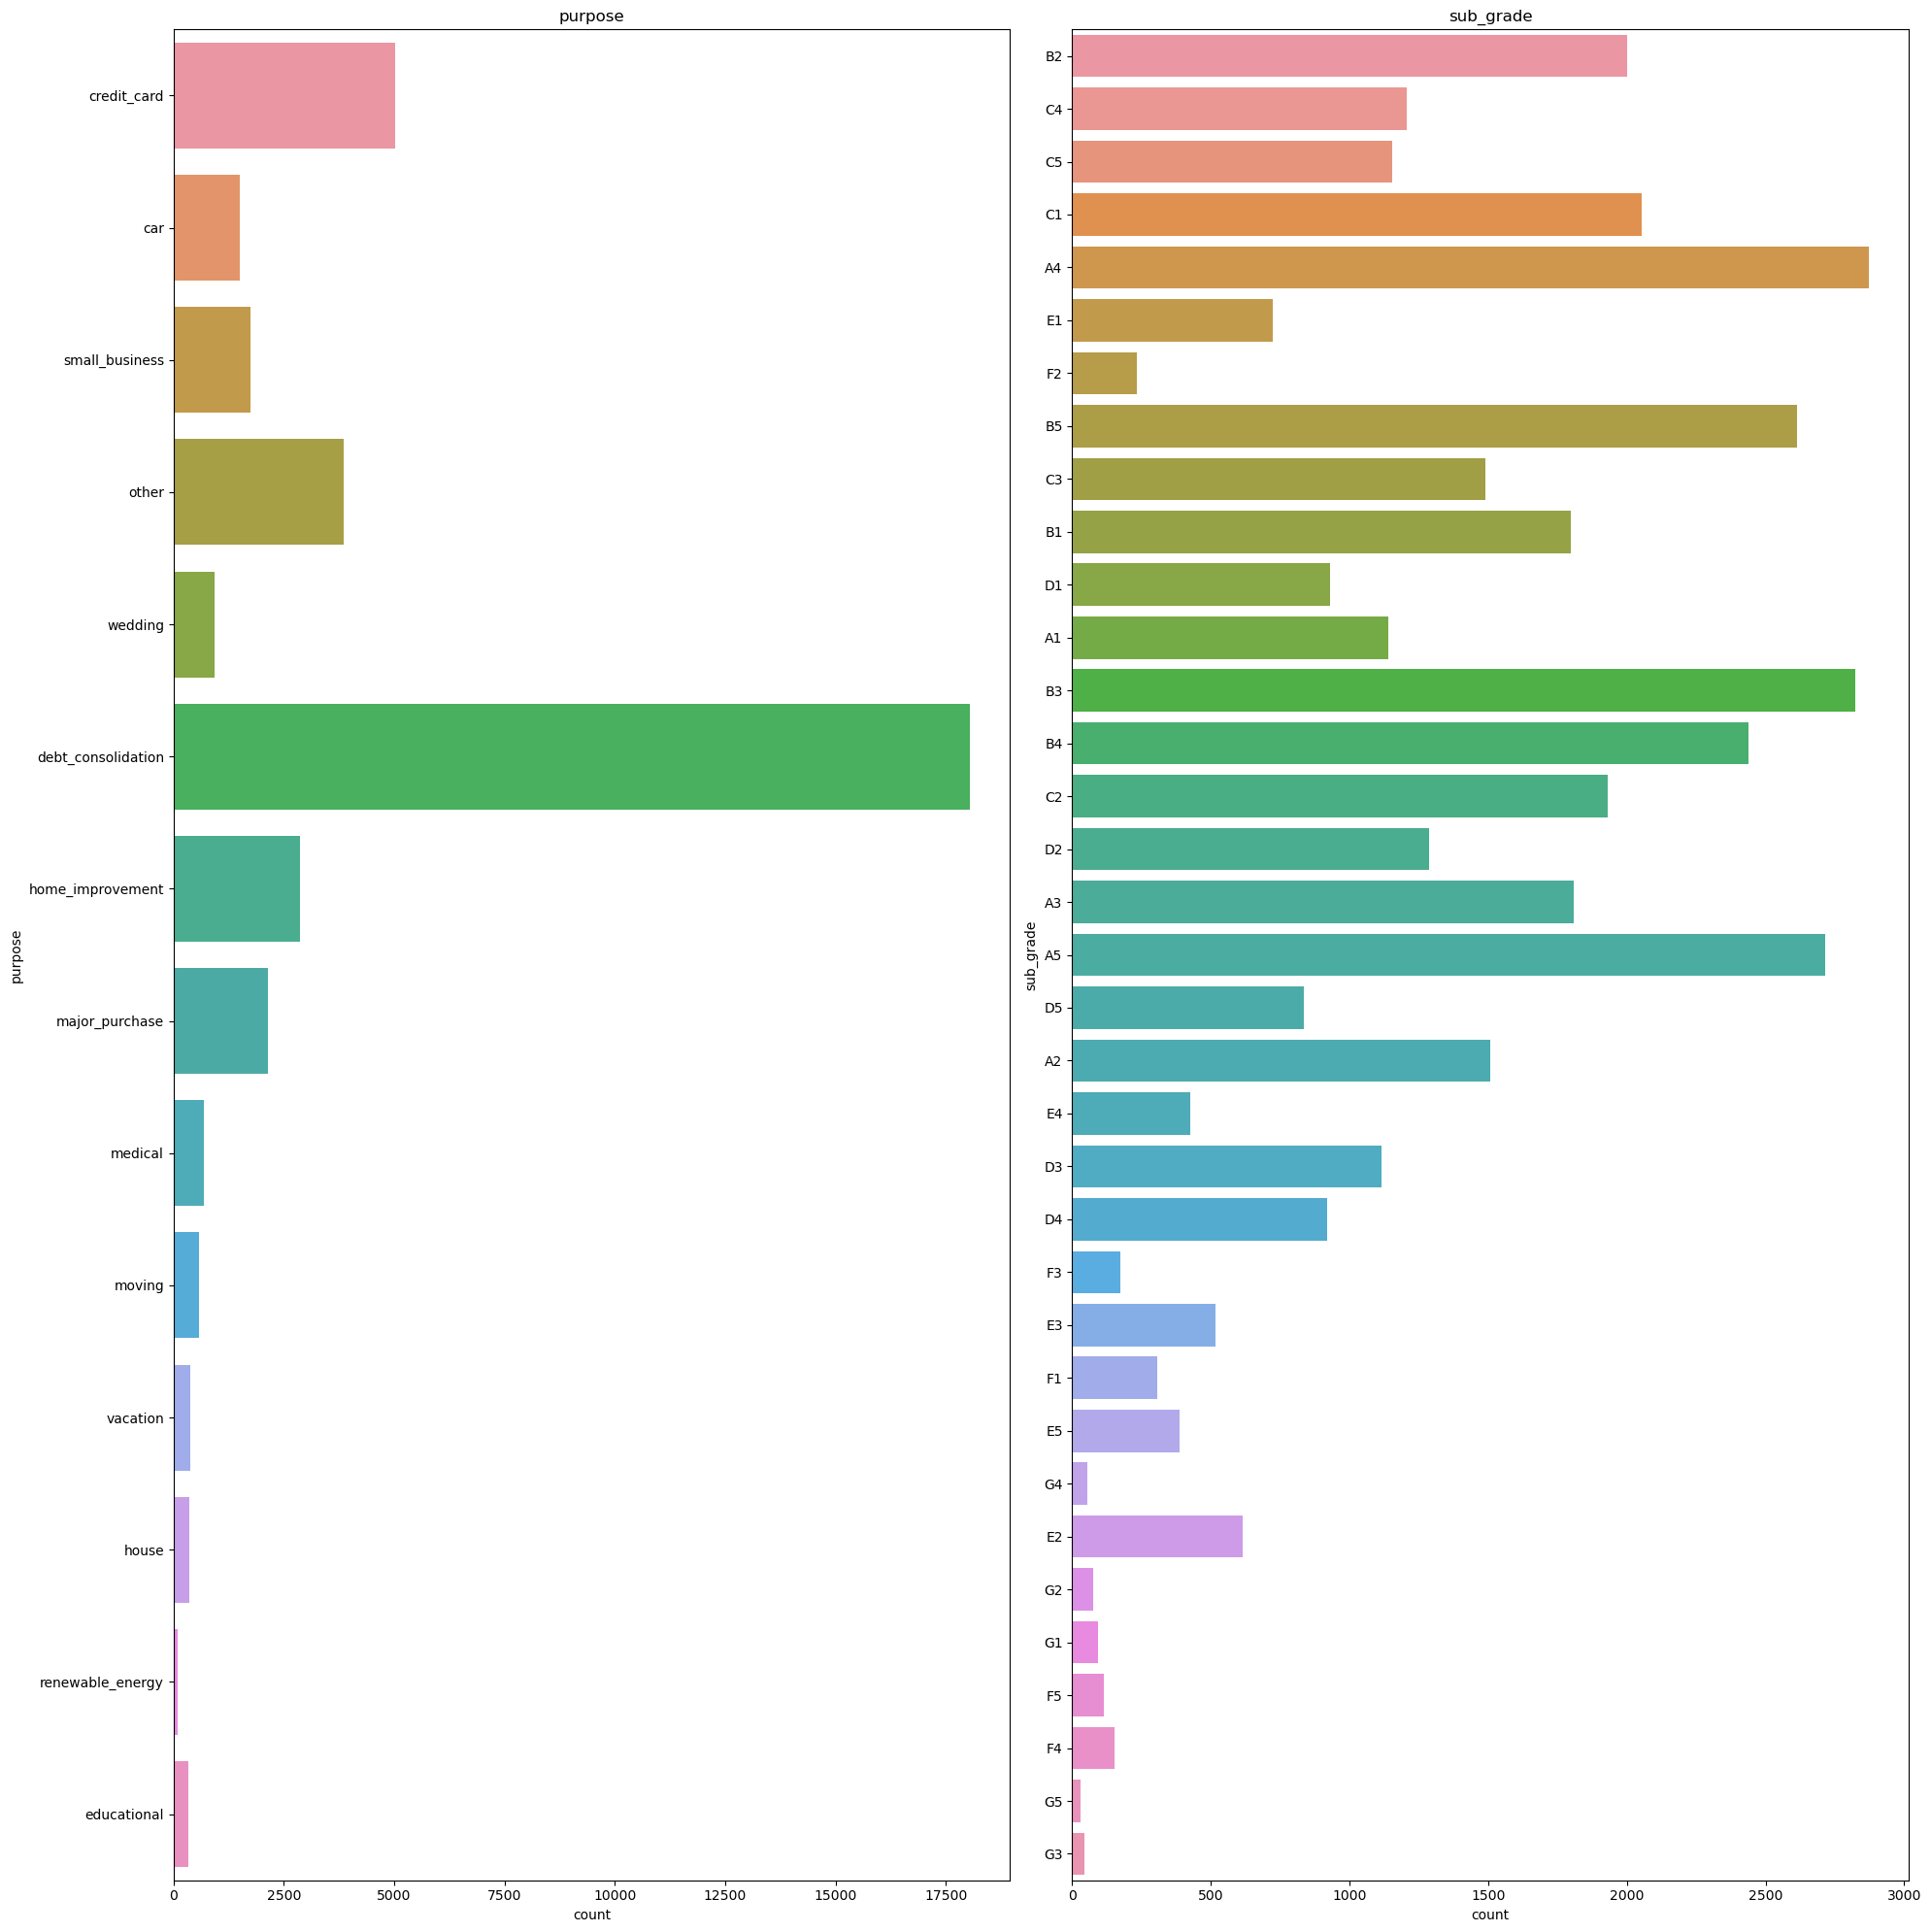

In [51]:
# Creating plots
count_plot_horizontal(categorical_cols_horizontal,1,2)

### 6.1. Observations from univariate analysis of categorical variables: 
1. **75%** of the loans are for a term of 36 months.
2. Around **12.5%** of the loans are defaulted.
3. Percentage of income not verified users is high.It will be interesting to see its correlation with loan_status.
4. **95%**  of the borrowers stay in RENT/MORTGAGE property. 
5. **50%** of the borrowers take loans for the purpose of debt consolidation.
6. There are more borrowers with more than 10 years of employment length.
7. Investors prefer to give loans to borrowers falling under grade A,B,C,D.


# 7.Univariate Analysis - Continous Variables 

#### We would deal with individual variables here, as the continous variables like loan_amnt and annual_inc can reveal good insights 
We will be looking at the below Continous variables 
1. loan_amnt : The listed amount of the loan applied for by the borrower.
2. int_rate : Interest Rate on the loan
3. annual_inc : The self-reported annual income provided by the borrower during registration.
4. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
5. installment : The monthly payment owed by the borrower if the loan originates.
6. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.




### 7.1. loan_amnt:


In [52]:
# Numerical summary 
numerical_summary('loan_amnt')

Numerical Summary: 
Min : 500
Max : 35000
25% Data : 5300.0
Mean: 11047.02542966016
75% Data : 15000.0
90% Data : 21600.0
99% Data : 35000.0
100% Data : 35000.0


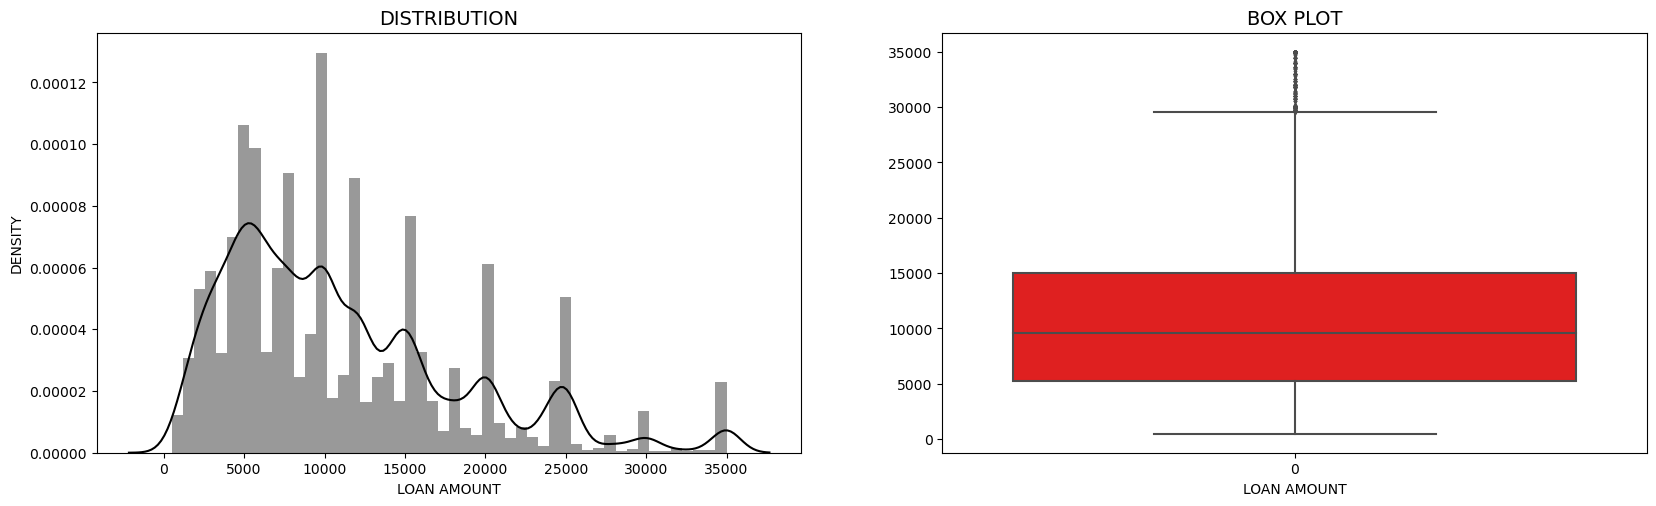

In [53]:
# Distribution plot and outlier plot
dist_plot_box_plot('loan_amnt','DISTRIBUTION','BOX PLOT','LOAN AMOUNT','DENSITY')

#### Observations: 
1. Most of the borrowers prefer to get loan amount between 5k to 15k.
2. Looks like the feature "loan_amnt" has outliers in the upper fence

### 7.2. int_rate :

In [54]:
# Numerical summary 
numerical_summary('int_rate')

Numerical Summary: 
Min : 5.42
Max : 24.4
25% Data : 8.94
Mean: 11.93221867952407
75% Data : 14.38
90% Data : 16.82
99% Data : 20.99
100% Data : 24.4


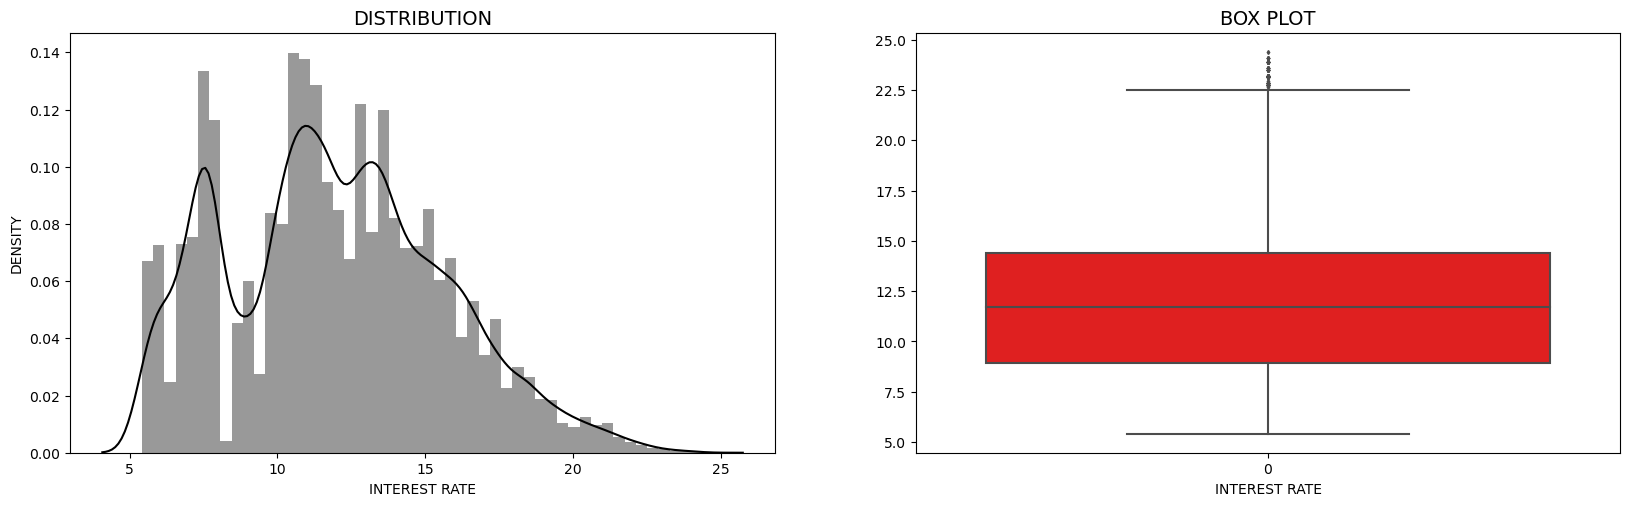

In [55]:
# Distribution plot and outlier plot
dist_plot_box_plot('int_rate','DISTRIBUTION','BOX PLOT','INTEREST RATE','DENSITY')

#### Observations:
1. The average interest rate is 12% but there is huge jump after 75 percentile.
2. General tendency is to take loans below 15% interest rate.

### 7.3. annual_inc :

In [56]:
# Numerical summary 
numerical_summary('annual_inc')

Numerical Summary: 
Min : 4000.0
Max : 6000000.0
25% Data : 40000.0
Mean: 68777.97368120901
75% Data : 82000.0
90% Data : 115000.0
99% Data : 234143.99999999878
100% Data : 6000000.0


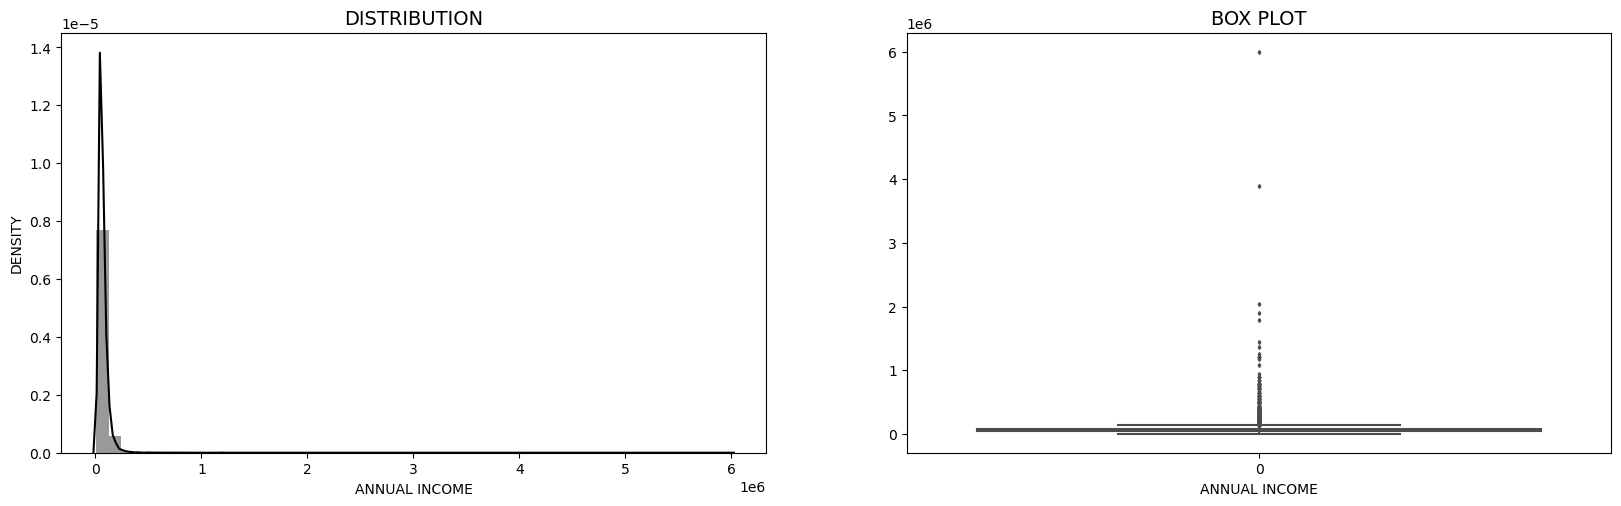

In [57]:
# Distribution plot and outlier plot
dist_plot_box_plot('annual_inc','DISTRIBUTION','BOX PLOT','ANNUAL INCOME','DENSITY')

#### Observations: 
1. We can clearly see that the feature "annual_inc" has outliers in the upper fence.
2. There is a huge jump between 99th and 100th quantile of data in "annual_inc" and that can be trimmed  for better analysis.

### 7.4. dti :

In [58]:
# Numerical summary 
numerical_summary('dti')

Numerical Summary: 
Min : 0.0
Max : 29.99
25% Data : 8.13
Mean: 13.272727013505456
75% Data : 18.56
90% Data : 22.29
99% Data : 26.53
100% Data : 29.99


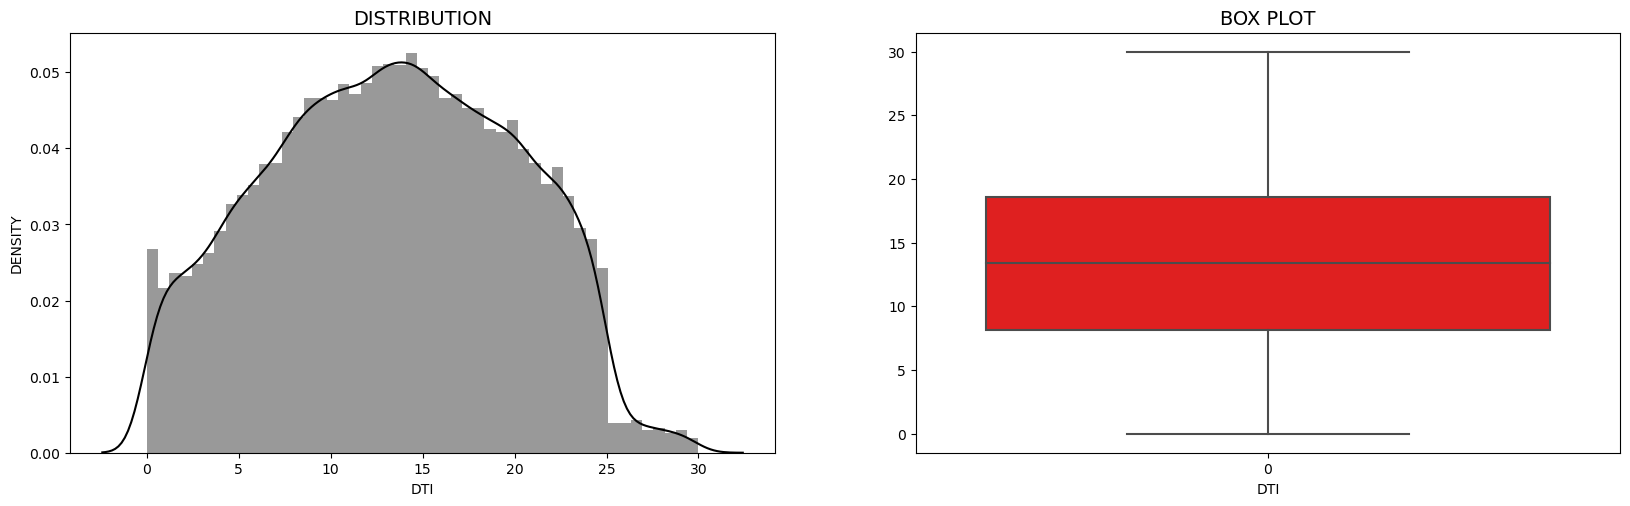

In [59]:
# Distribution plot and outlier plot
dist_plot_box_plot('dti','DISTRIBUTION','BOX PLOT','DTI','DENSITY')

#### Observations:
1. Data is very evenly distributed.We will check its correlation with Loan_status to see if its relevant for analysis.

### 7.5. installment :

In [60]:
# Numerical summary 
numerical_summary('installment')

Numerical Summary: 
Min : 15.69
Max : 1305.19
25% Data : 165.74
Mean: 322.466318013324
75% Data : 425.55
90% Data : 620.9
99% Data : 931.09
100% Data : 1305.19


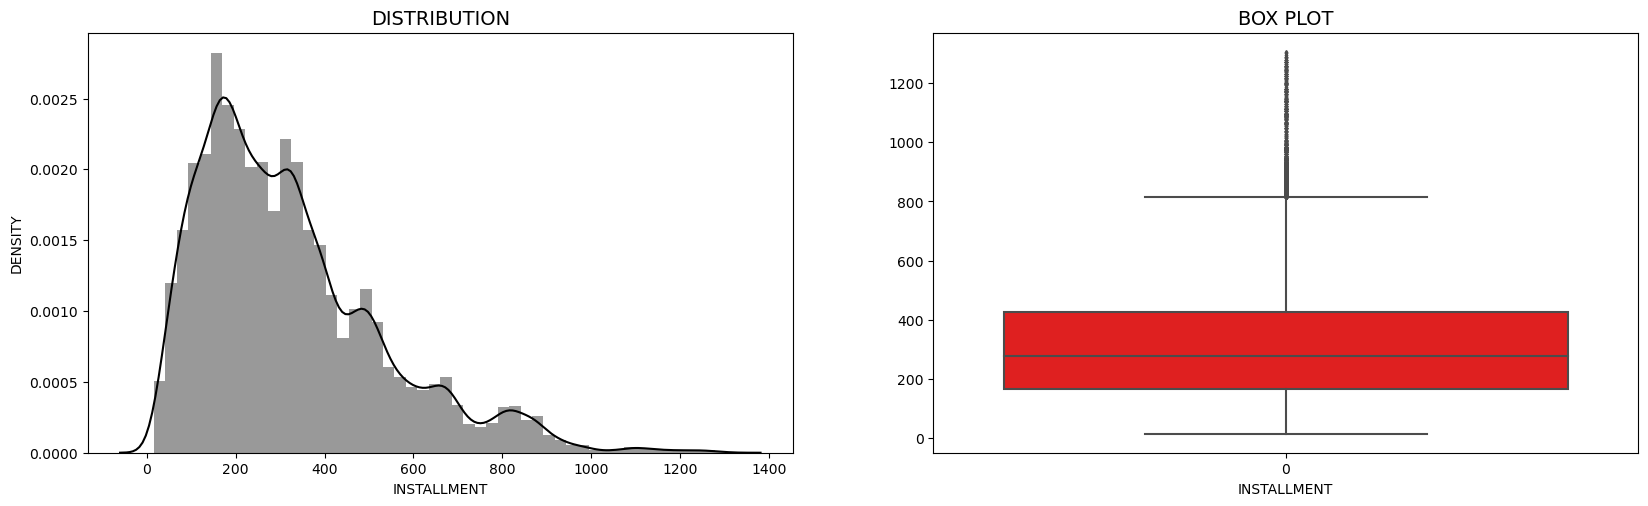

In [61]:
# Distribution plot and outlier plot
dist_plot_box_plot('installment','DISTRIBUTION','BOX PLOT','INSTALLMENT','DENSITY')

### 7.6. revol_util :

In [62]:
# Numerical summary 
numerical_summary('revol_util')

Numerical Summary: 
Min : 0.0
Max : 99.9
25% Data : 25.2
Mean: 48.70355082043705
75% Data : 72.2
90% Data : 87.8
99% Data : 98.5
100% Data : 99.9


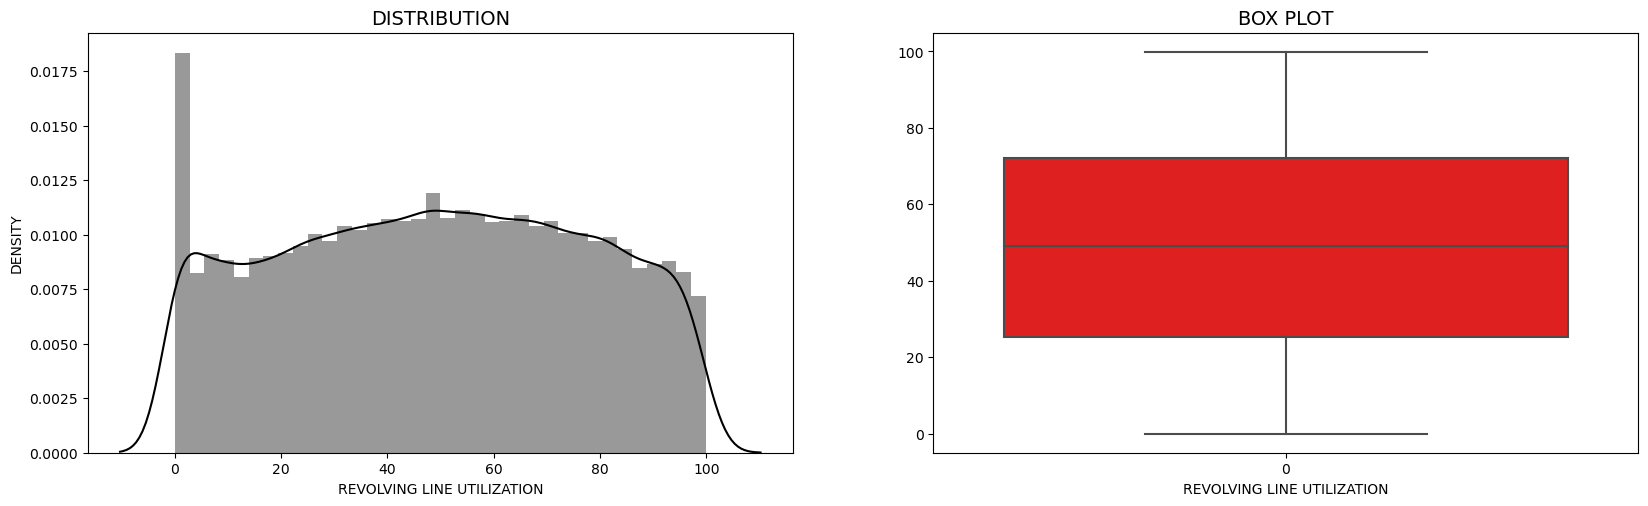

In [63]:
# Distribution plot and outlier plot
dist_plot_box_plot('revol_util','DISTRIBUTION','BOX PLOT','REVOLVING LINE UTILIZATION','DENSITY')

# 8.Outlier Treatment:

#### From the above Univariate analysis, we see that the feature Annual_Inc needs Outlier treatment. 
We can get rid of the outliers after the 99th Quantile

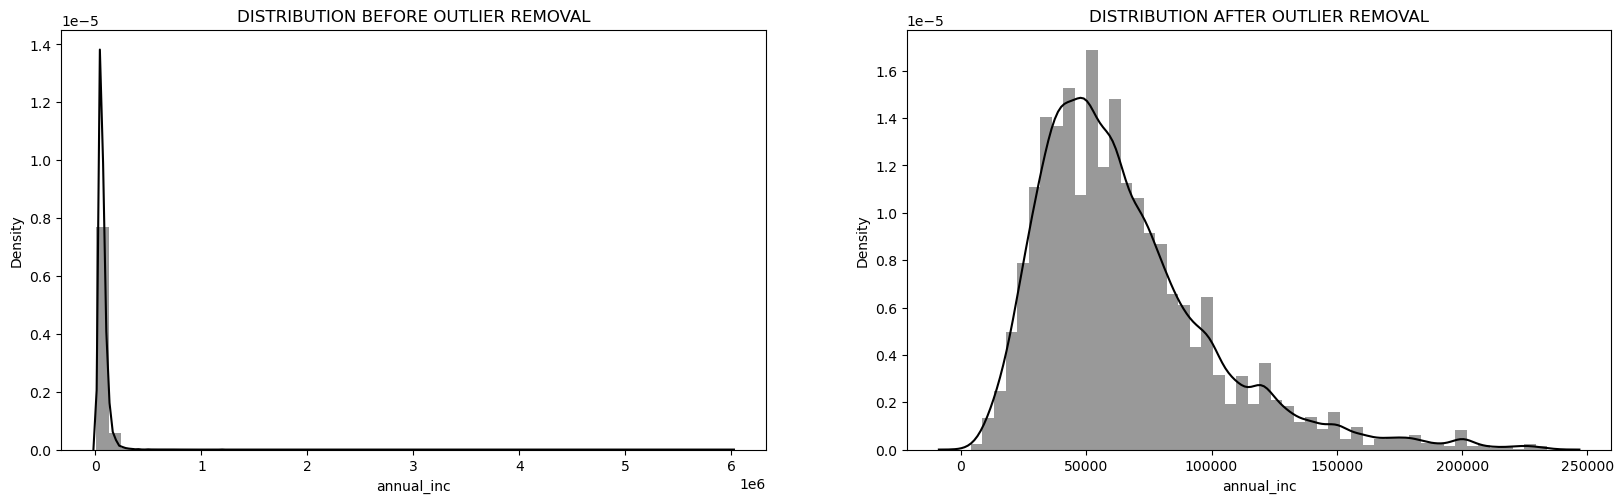

In [64]:
# Removing the data above 99% in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(df['annual_inc'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL')

# Removing outliers
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(df['annual_inc'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()

# 9.Binning
#### The above univariate analysis helps us understand that we can use binning on the continous variables above .
Applying binning to aid further in bivariate and multivariate analysis

In [65]:
# Creating categorical buckets for loan amount
df["loan_amnt_bkt"] = pd.cut(df['loan_amnt'], 
                               list(range(0,40001,7000)), 
                               labels = ['0 - 7k', '7k - 14k', '14k - 21k', '21k - 28k', '28k+'])

# Creating categorical buckets for interest rate
df["int_rate_bkt"] = pd.cut(df['int_rate'], 
                               list(range(5,26,5)), 
                               labels = ['5% - 10%', '10% - 15%', '15% - 20%', '20%+'])


# Creating categorical buckets for annual income
df['annual_inc_bkt'] = pd.cut(df['annual_inc'],
                                 list(range(0,250001,50000)), 
                                 labels = ['0 - 50k', '50k - 100k', '100k - 150k', '150k - 200k', '200k+'])

# Creating categorical buckets for installment
df["installment_bkt"] = pd.cut(df['installment'], 
                               list(range(0,1401,200)), 
                               labels = ['0 - 200', '200 - 400', '400 - 600', '600 - 800', 
                                         '800 - 1000', '1000 - 1200', '1200+'])
# Creating categorical buckets for dti
df["dti_bkt"] = pd.cut(df['dti'], 
                               list(range(0,31,5)), 
                               labels = ['0 - 5', '5 - 10', '10 - 15', '15 - 20', 
                                         '20 - 25', '25+'])
# Creating categorical buckets for revol_util
df["revol_util_bkt"] = pd.cut(df['revol_util'], 
                               list(range(0,101,20)), 
                               labels = ['0 - 20', '20 - 40', '40 - 60', '60 - 80', 
                                         '80+'])

In [66]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,loan_amnt_bkt,int_rate_bkt,annual_inc_bkt,installment_bkt,dti_bkt,revol_util_bkt
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00,12,2011,1,1985,0 - 7k,10% - 15%,0 - 50k,0 - 200,25+,80+
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00,12,2011,4,1999,0 - 7k,15% - 20%,0 - 50k,0 - 200,0 - 5,0 - 20
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00,12,2011,11,2001,0 - 7k,15% - 20%,0 - 50k,0 - 200,5 - 10,80+
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00,12,2011,2,1996,7k - 14k,10% - 15%,0 - 50k,200 - 400,15 - 20,20 - 40
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.00,12,2011,11,2004,0 - 7k,5% - 10%,0 - 50k,0 - 200,10 - 15,20 - 40


#### 9.1. Visualizing the bins created

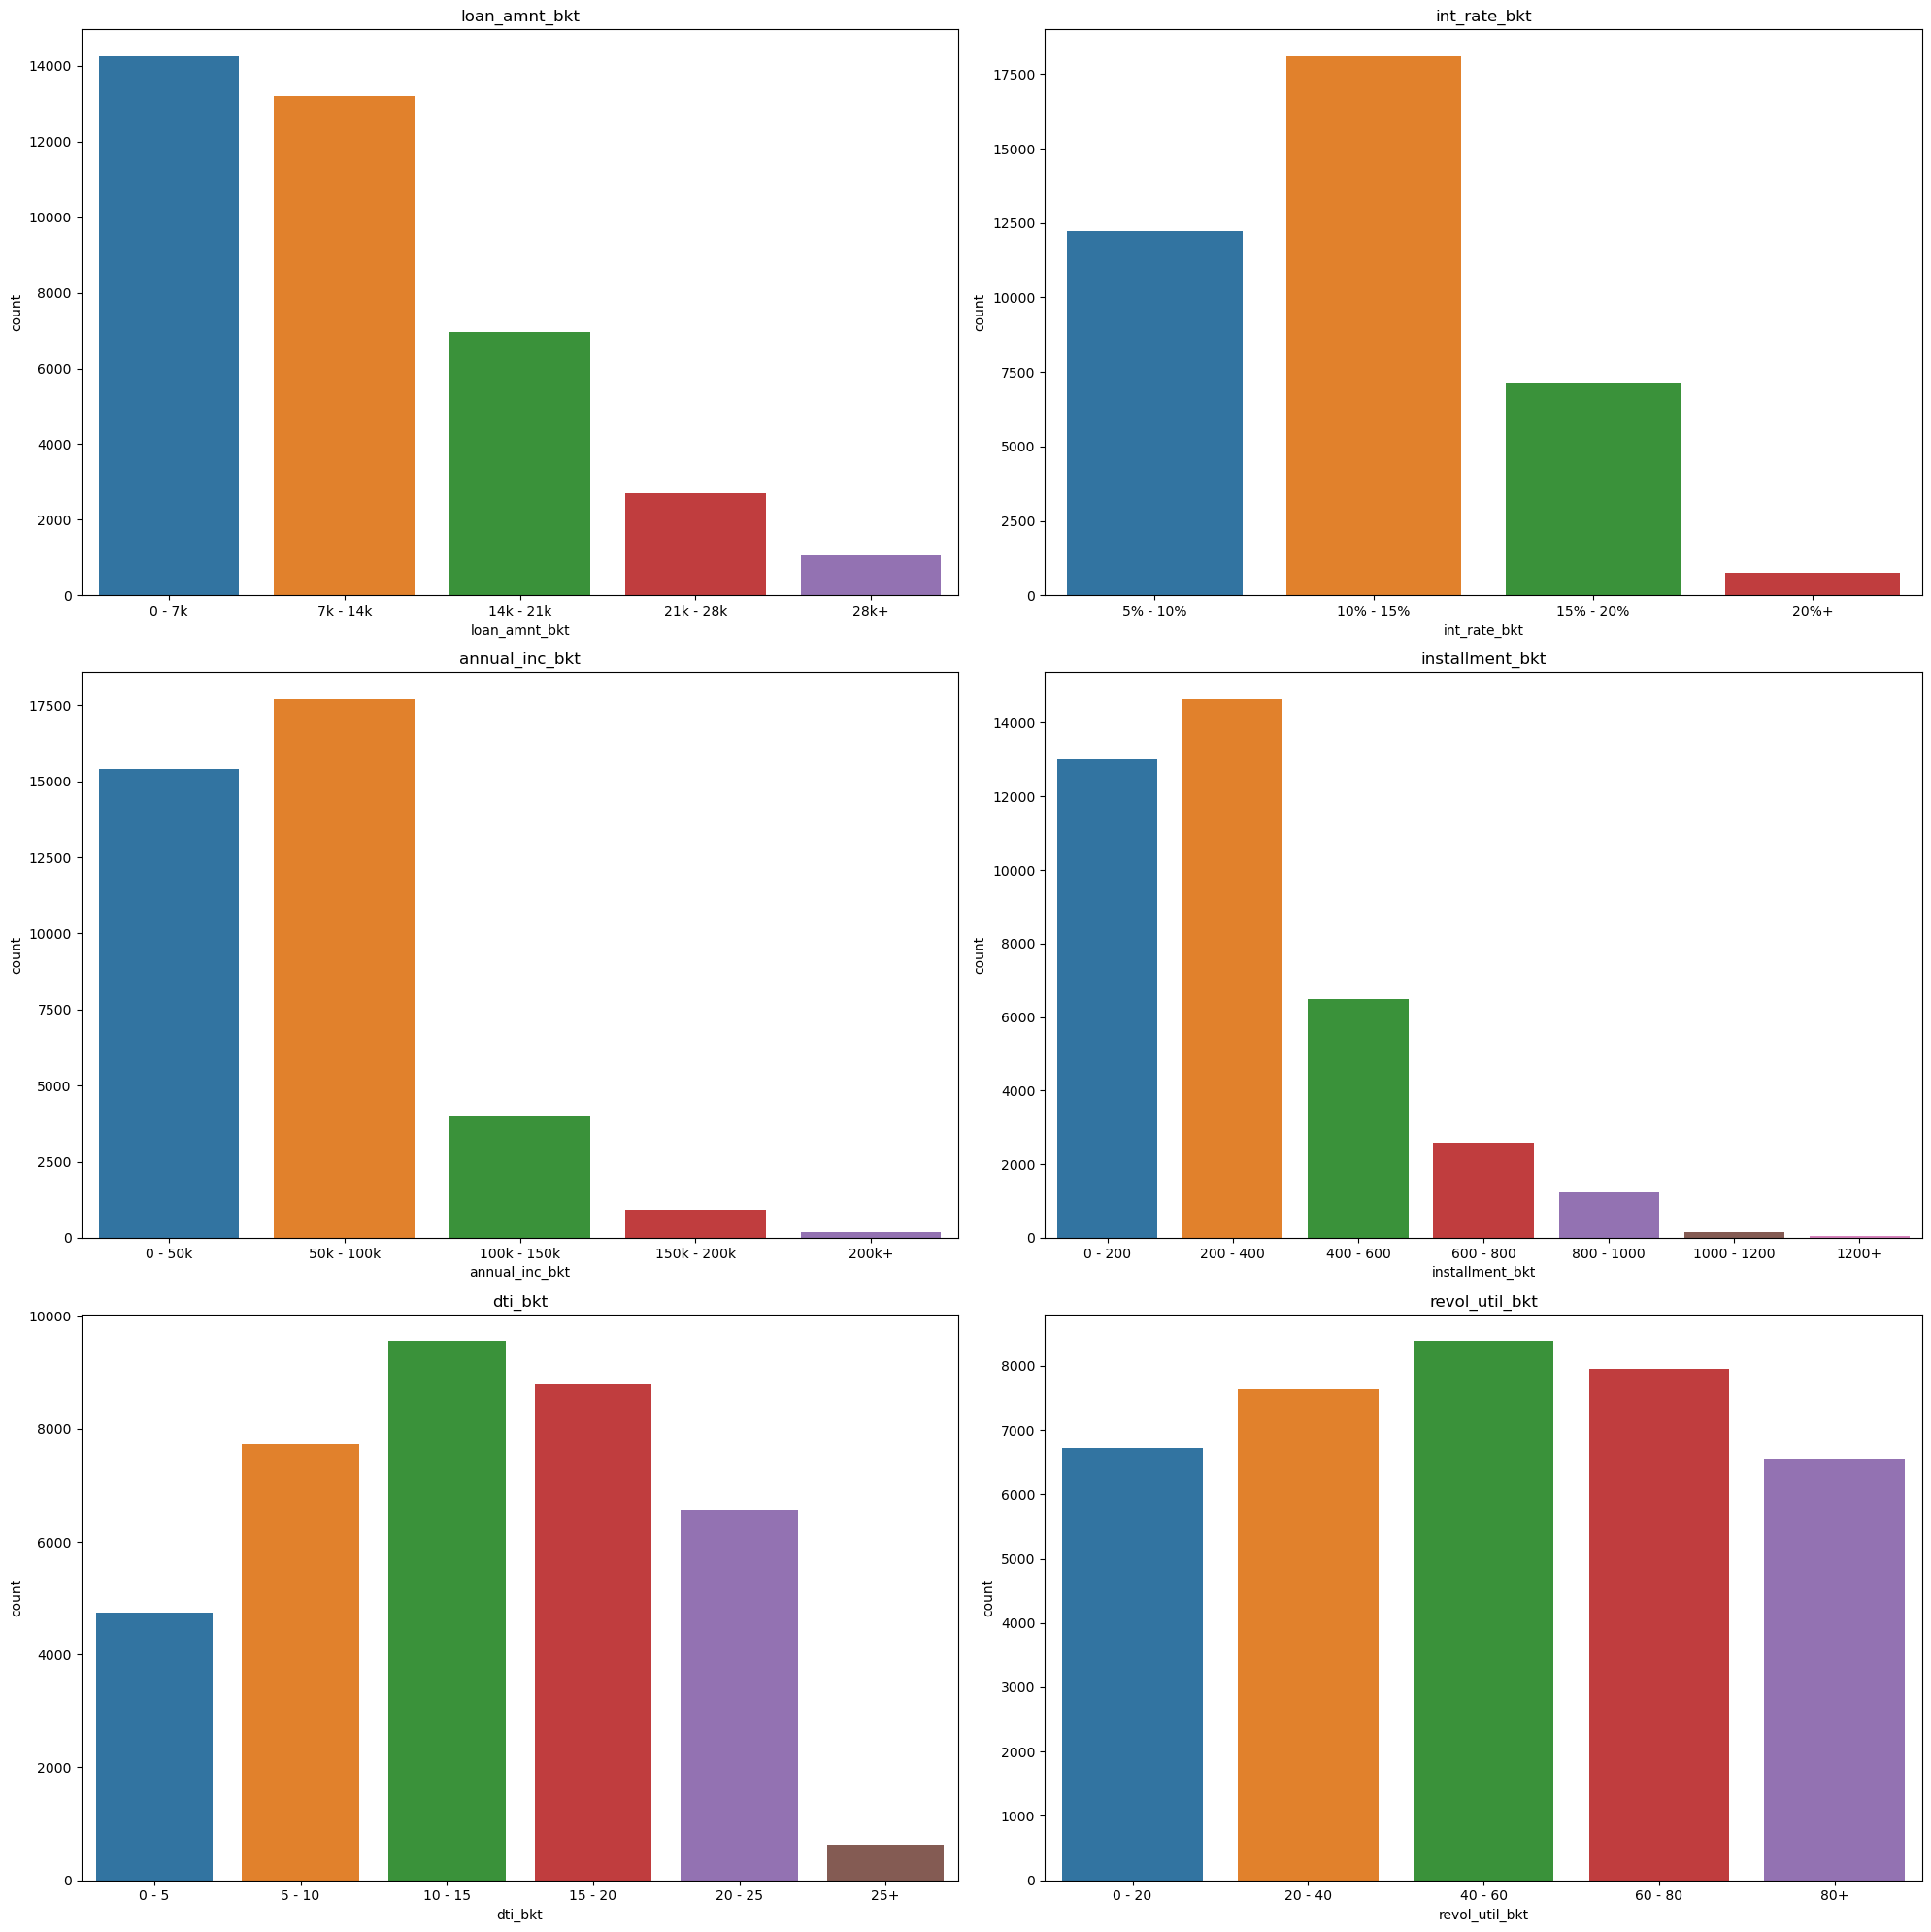

In [67]:
# Creating plots

bin_cols=['loan_amnt_bkt','int_rate_bkt','annual_inc_bkt','installment_bkt','dti_bkt','revol_util_bkt']
count_plot_vertical(bin_cols,3,2)

# 10.Bivariate Analysis 

#### As we are majorly interested in the loan_status correlation with different params,lets check this first 
1. Correlation of all the categorical variables identified with loan_status
2. Correlation of the created bins for Continous variables with loan_status


In [68]:
#Removing loan_status from the defined list of categorical variables
categorical_cols_vertical=['term','pub_rec_bankruptcies','verification_status','pub_rec','home_ownership','grade','inq_last_6mths','delinq_2yrs','emp_length']

#### 10.1. Plotting count plots with percentage on the bar for each of the x variable (Example:For term 36, 88.9% of loans are fully paid and 11.1% of loans are defaulted)

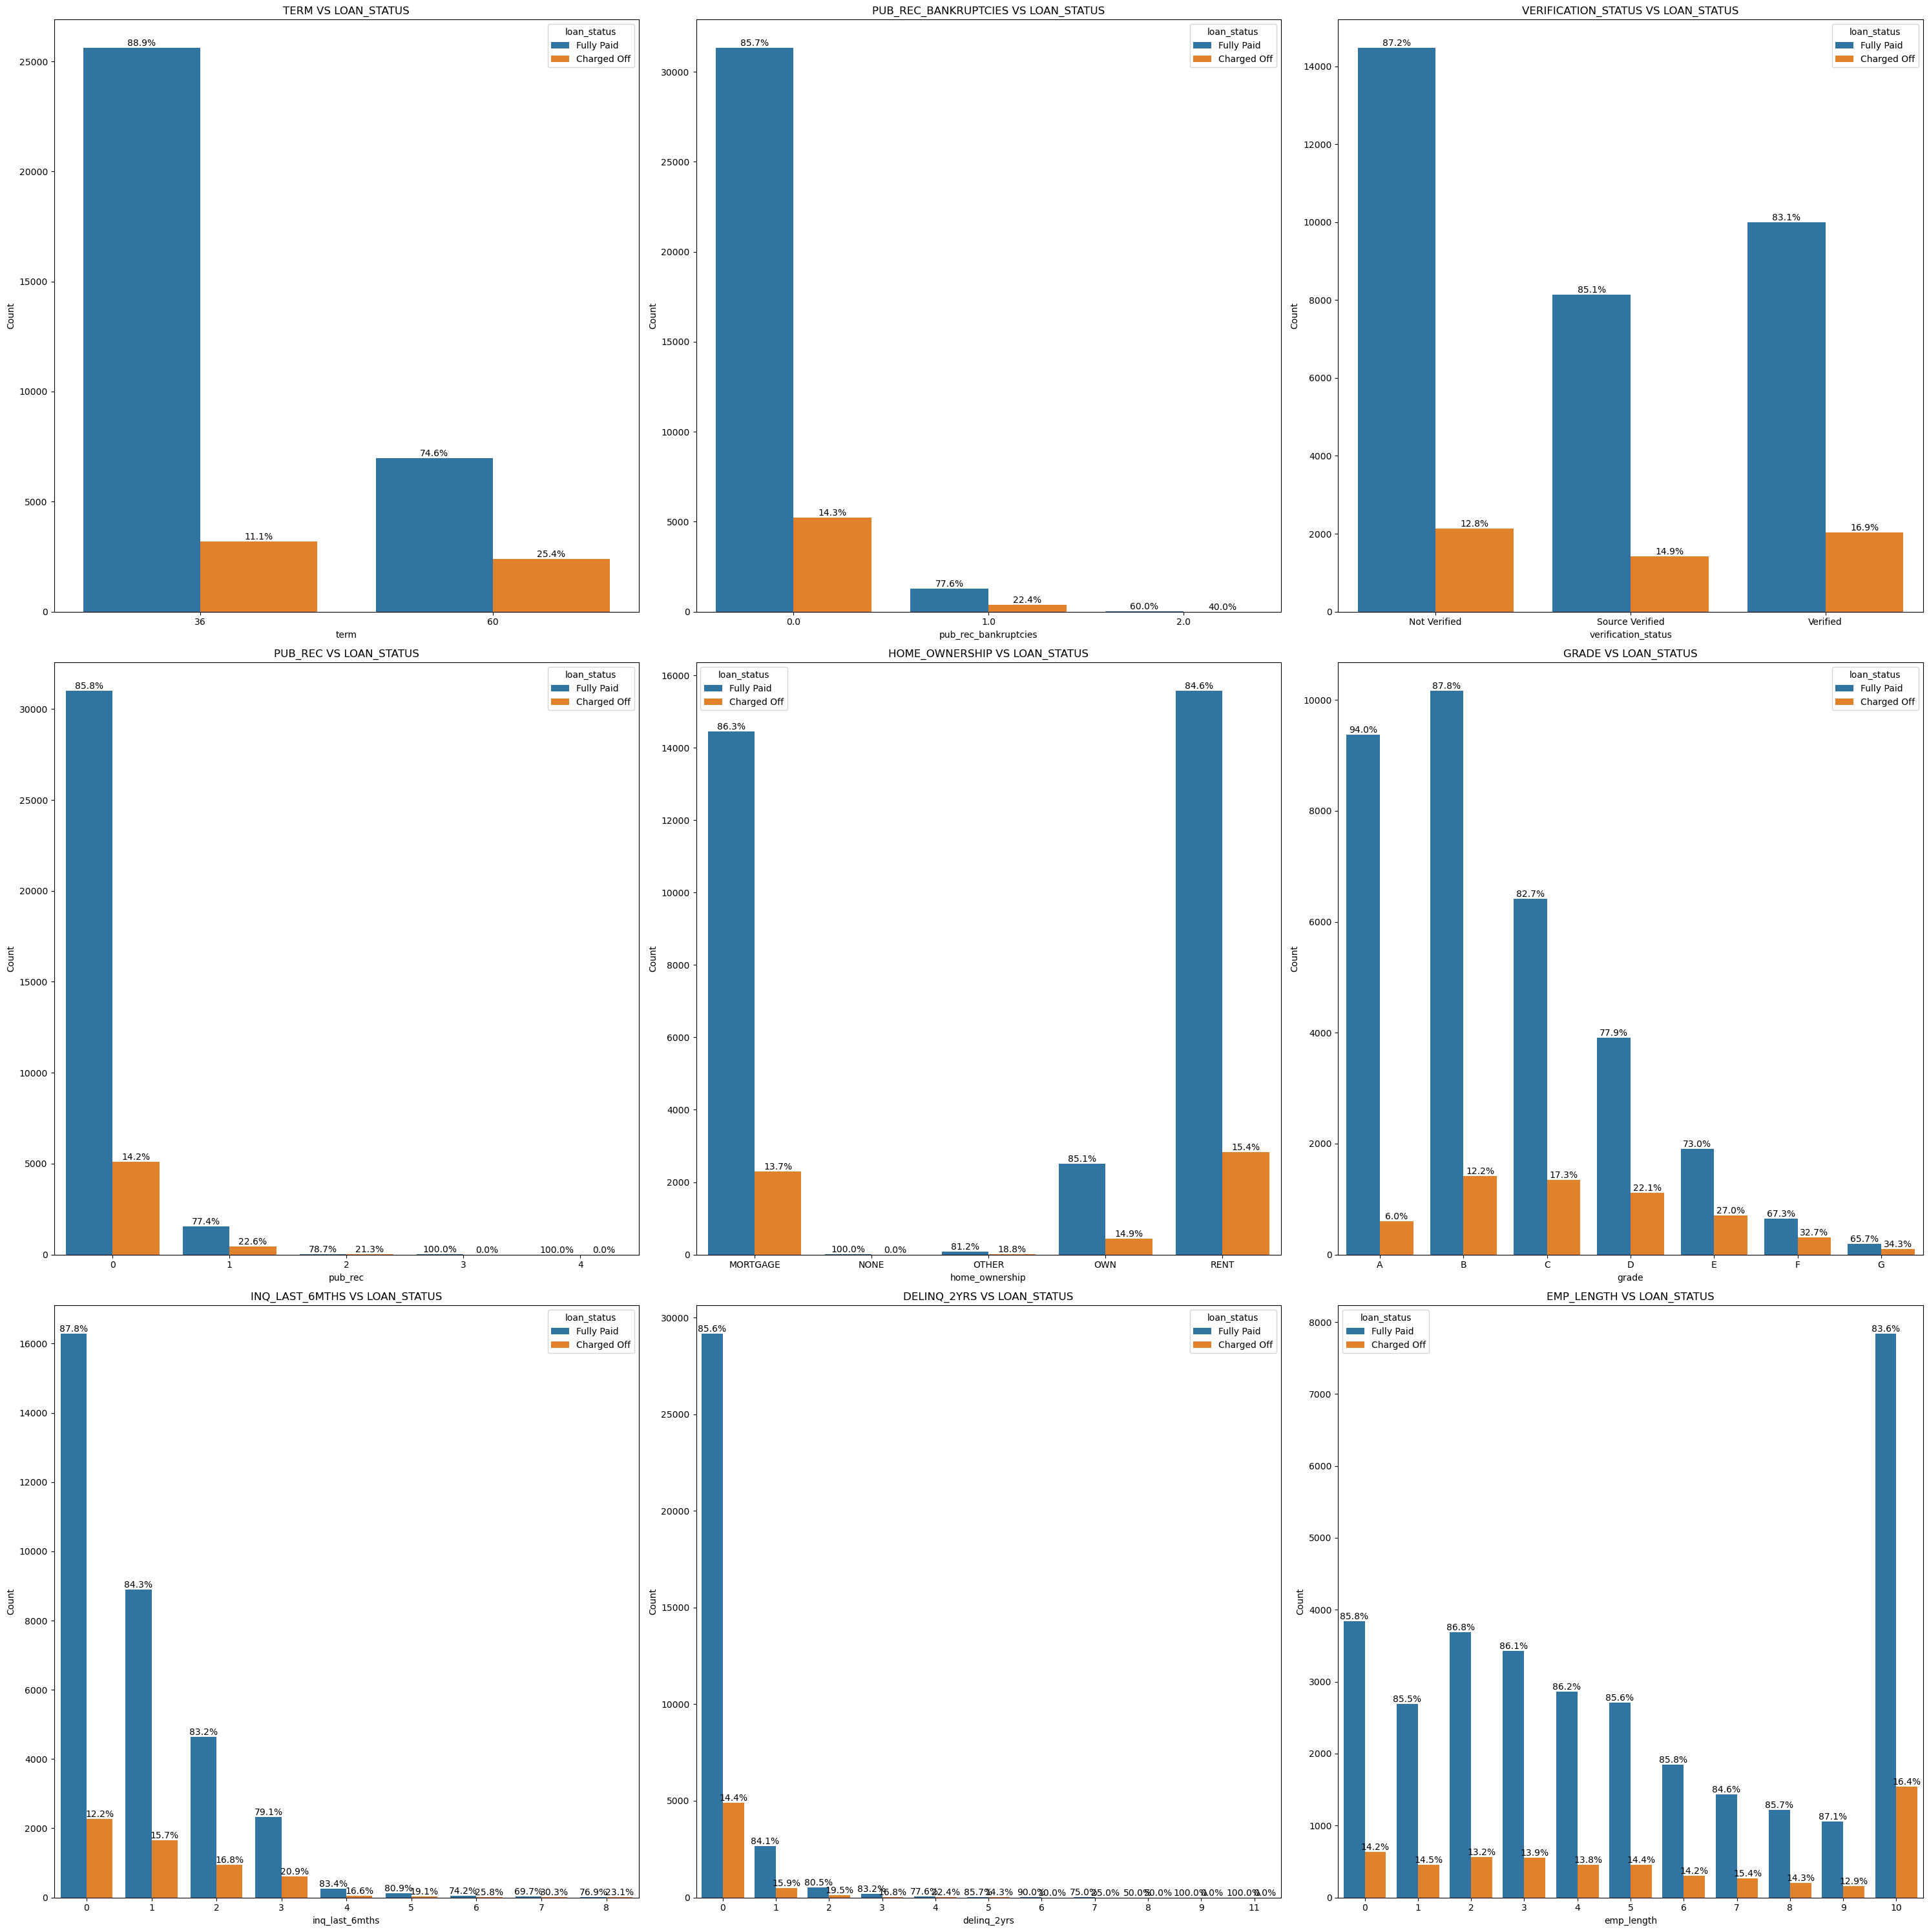

In [69]:
# Creating plots Vertical 
#
# Define the number of rows and columns in the matrix
num_rows = 3
num_cols = 3
# Create a figure and axes for the matrix of countplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))
# Flatten the axes matrix to make it easier to iterate over
axes = axes.flatten()
for i, ax in enumerate(axes):
    # Select the corresponding column from the data for each countplot
    column = df[categorical_cols_vertical[i]]
    sorted_x = sorted(df[categorical_cols_vertical[i]].unique())
    # Create the countplot with hue and show the counts and percentages as annotations
    ax = sns.countplot(x=column, hue='loan_status', data=df,ax=ax,order=sorted_x)
    ax.set_ylabel('Count')
    ax.set_title(categorical_cols_vertical[i].upper()+' VS LOAN_STATUS')
    total_counts = df.groupby([categorical_cols_vertical[i], 'loan_status']).size().reset_index(name='count')
    cnt=0
    #The below code is to print the percentage on the bar for each of the x variable (example for term 36, 88.9% of loans are fully paid and 11.1% of loans are defaulted)
    for p in ax.patches:
        height = p.get_height()
        x_variable = sorted_x[cnt]
        total=total_counts[total_counts[categorical_cols_vertical[i]] == x_variable]
        total_val=total['count'].sum()
        percentage = height / total_val * 100
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
        cnt=cnt+1
        if cnt == len(sorted_x):
            cnt=0

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()


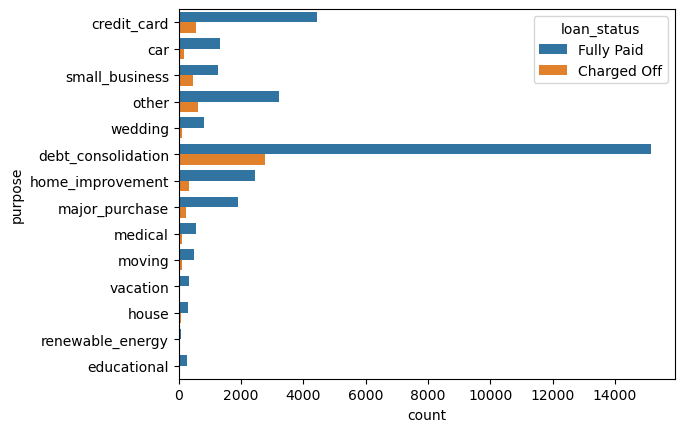

In [70]:
# Creating plots for Purpose
sns.countplot(y='purpose', data=df, hue='loan_status')
ax.set_title('PURPOSE VS LOAN_STATUS')
       
# Adjust the spacing between subplots
plt.show()

In [71]:
#Now lets see the contigency of these features 
contingency_tab('purpose','loan_status')

contingency row percentages : purpose and loan_status
loan_status         Charged Off  Fully Paid
purpose                                    
car                       10.73       89.27
credit_card               10.77       89.23
debt_consolidation        15.36       84.64
educational               17.03       82.97
home_improvement          12.08       87.92
house                     16.25       83.75
major_purchase            10.33       89.67
medical                   15.73       84.27
moving                    15.96       84.04
other                     16.42       83.58
renewable_energy          19.00       81.00
small_business            27.39       72.61
vacation                  14.13       85.87
wedding                   10.25       89.75


#### Observations:
1. Ratio of loans count vs charged off is high for loan term 60 months compared to 36 months. 11% for term 36 while 25% for term 60.
2. Borrowers with lower grades have higher default rate 
3. pub_rec 1 and 2 are showing higher percentages of default
4. As the number of inquiries in last 6 months increases, the chances of default increase.
5. pub_rec_banruptcies is a huge indicator of default 
6. emp_length is not contributing to default directly.
7. Debts taken for the purpose of small business have higher chances of defaulting(27%).

#### 10.2. offers status and addr_state :|

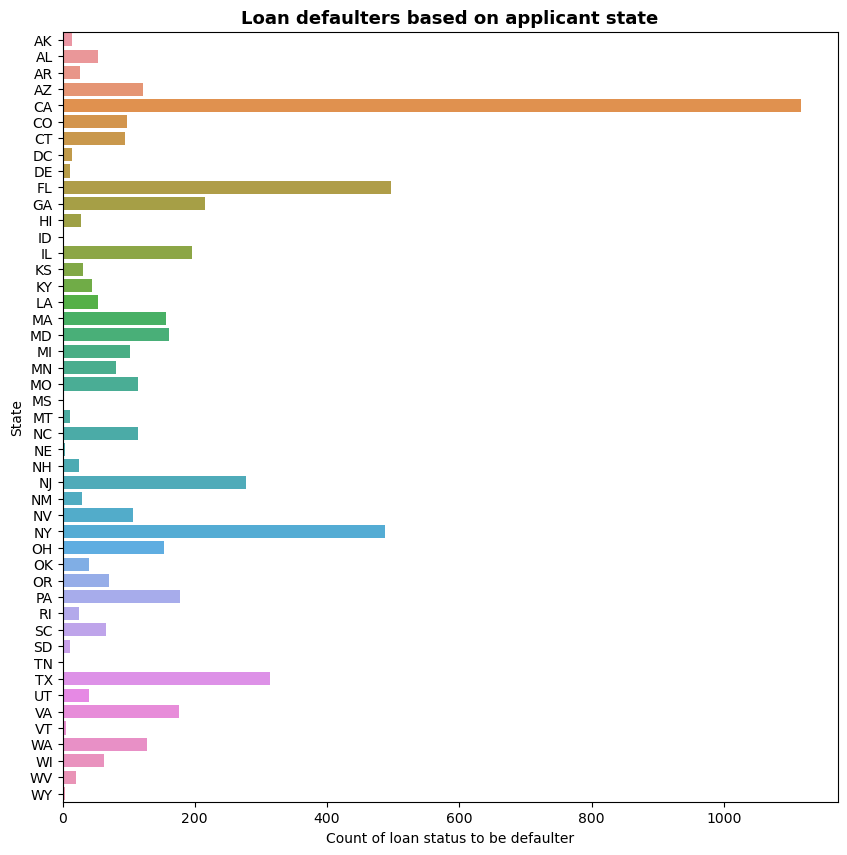

In [72]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.title('Loan defaulters based on applicant state',fontsize =13,fontweight = "bold")
plt.show()

In [73]:
#Now lets see the contigency of these features 
contingency_tab('addr_state','loan_status')

contingency row percentages : addr_state and loan_status
loan_status  Charged Off  Fully Paid
addr_state                          
AK                 18.18       81.82
AL                 12.50       87.50
AR                 11.49       88.51
AZ                 14.42       85.58
CA                 16.22       83.78
CO                 12.83       87.17
CT                 13.20       86.80
DC                  7.11       92.89
DE                 10.62       89.38
FL                 18.08       81.92
GA                 15.94       84.06
HI                 16.87       83.13
IA                  0.00      100.00
ID                 16.67       83.33
IL                 13.44       86.56
IN                  0.00      100.00
KS                 12.16       87.84
KY                 14.47       85.53
LA                 12.62       87.38
MA                 12.20       87.80
MD                 15.94       84.06
ME                  0.00      100.00
MI                 14.61       85.39
MN                

#### Observation: 
We see that Borrowers from CA have defaulted maximum,follwed by FL,NY and TX .But based on the contingency table, we can see tha this is only because of more number of loans from these states. It cannot be a driving factor, as we cannot correlate this increase with any specific financial/economical data of these states. 

#### 10.3. Plotting count plots for the binned continous variables , to see their correlation with loan_status

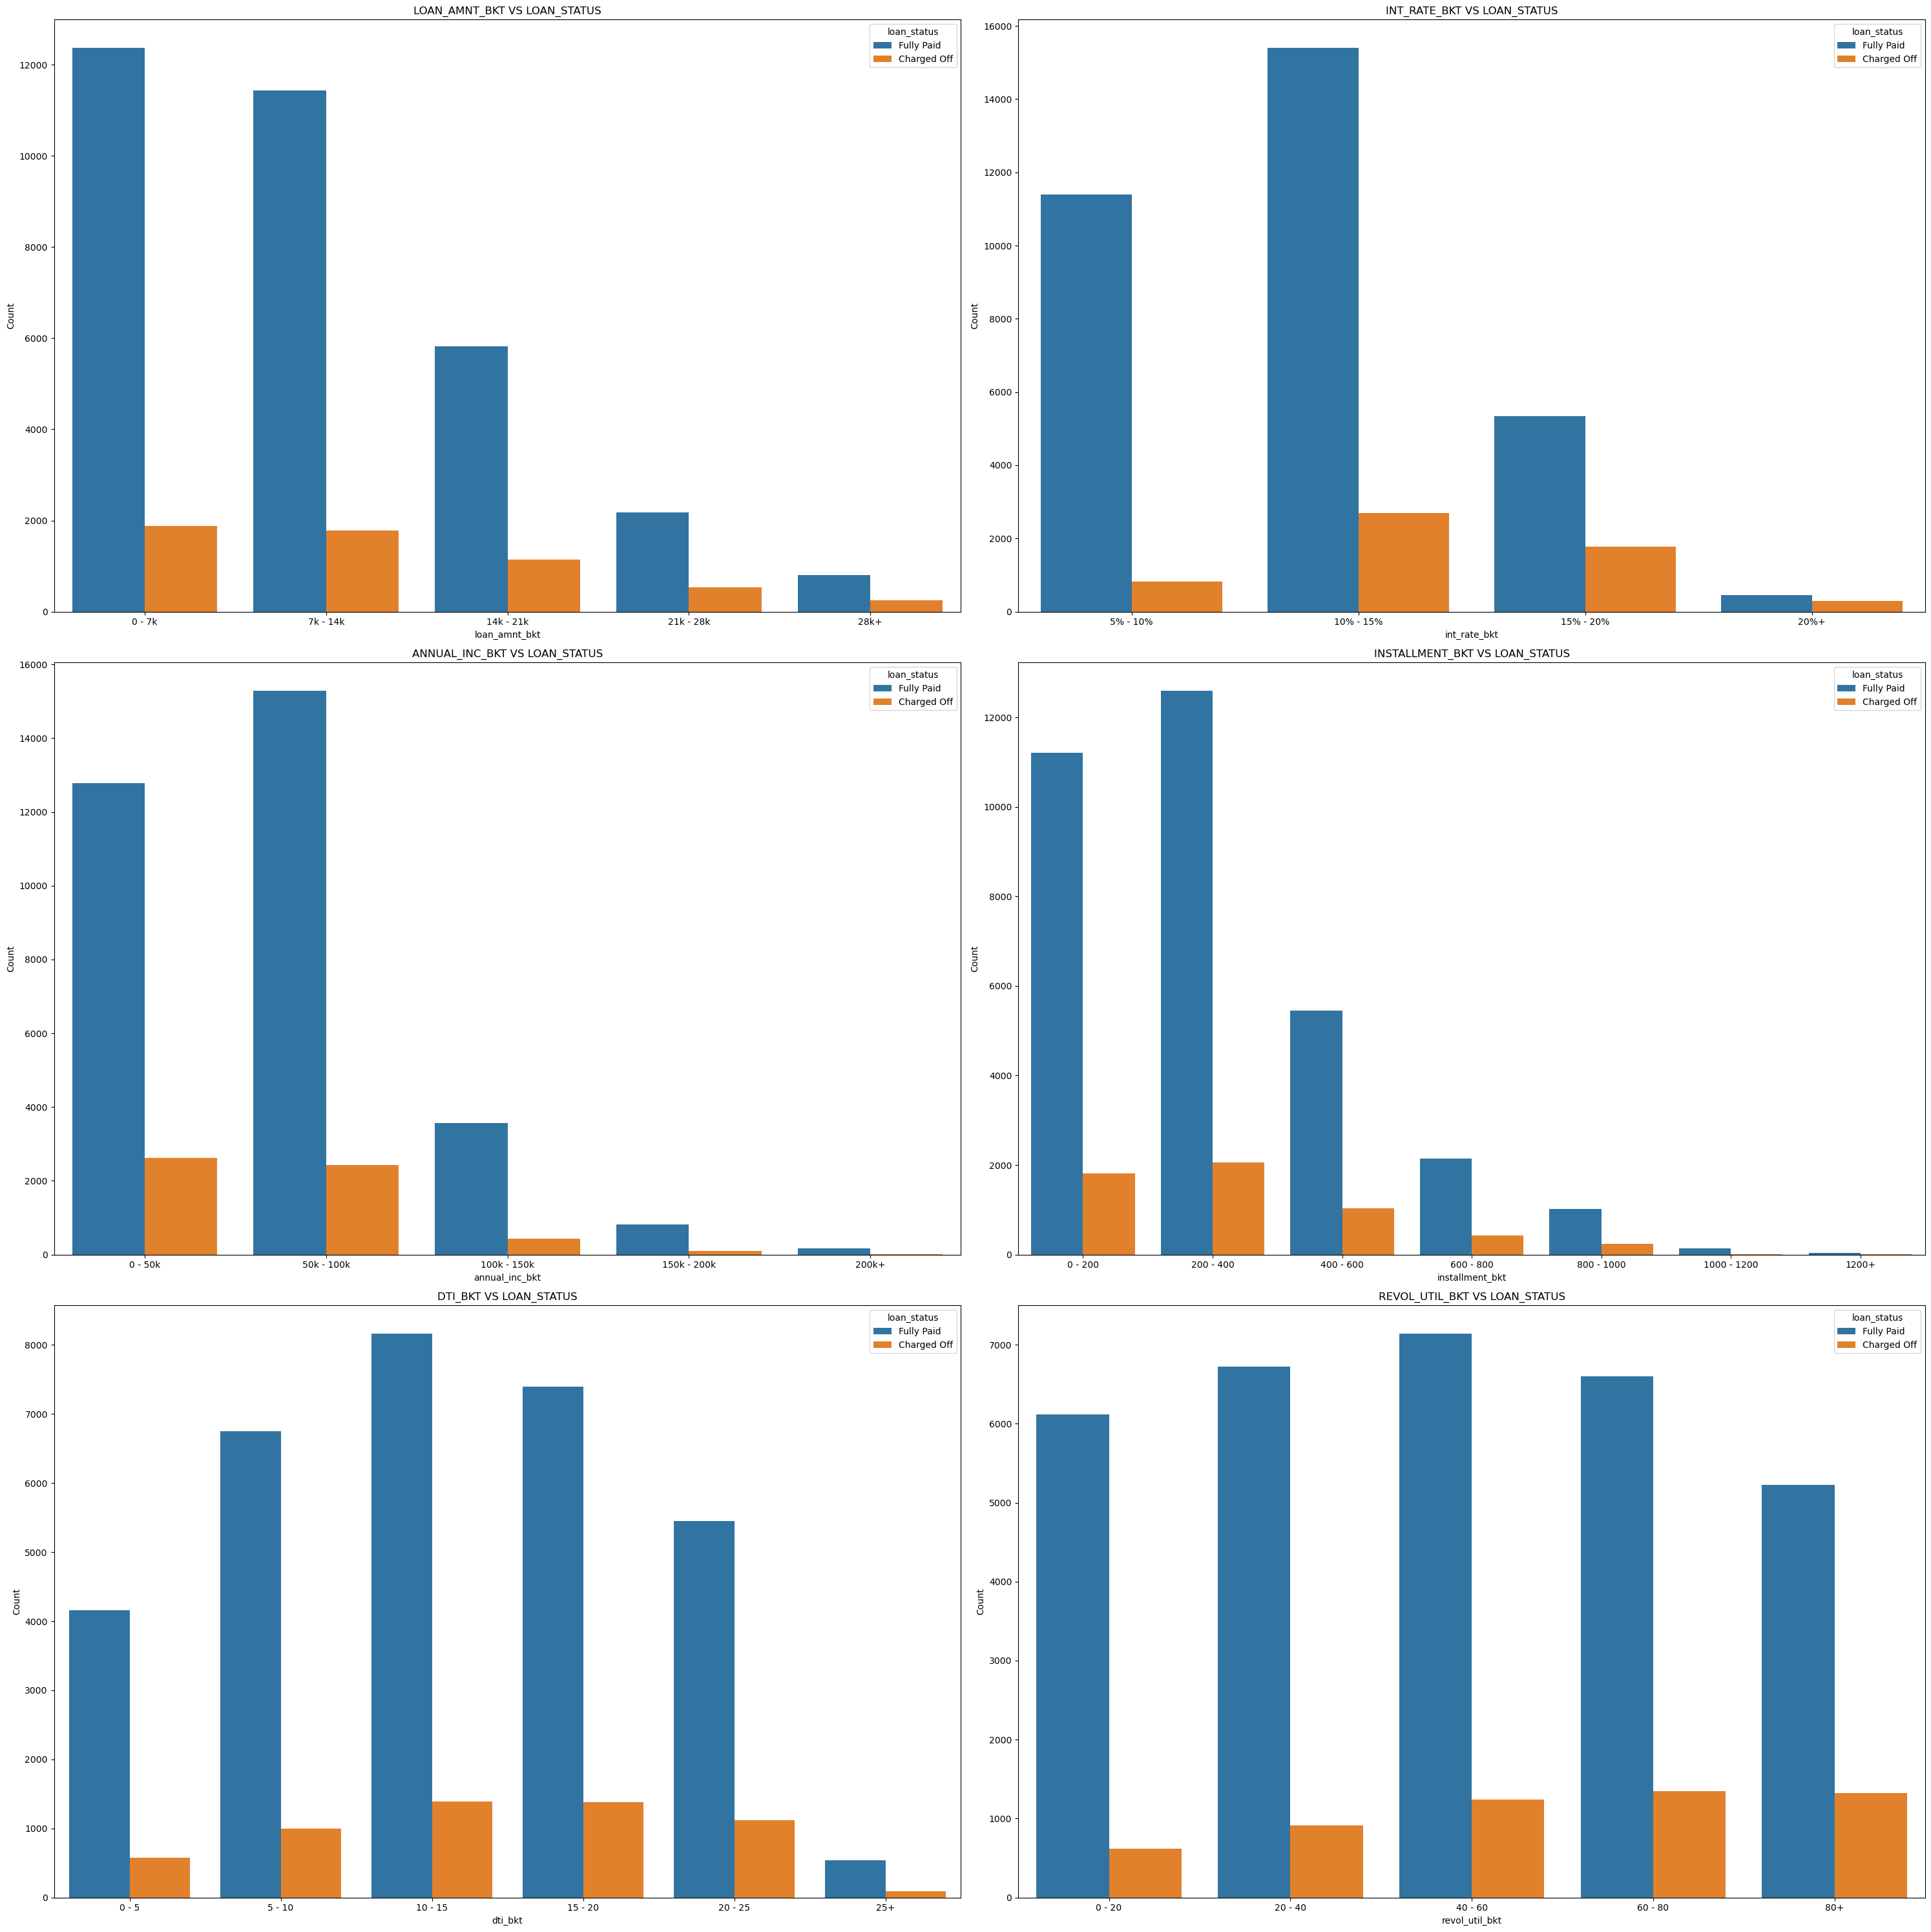

In [74]:
#verifying the loan status trend among the buckets created
cols=['loan_amnt_bkt','int_rate_bkt','annual_inc_bkt','installment_bkt','dti_bkt','revol_util_bkt']
# Define the number of rows and columns in the matrix
num_rows = 3
num_cols = 2
# Create a figure and axes for the matrix of countplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))
# Flatten the axes matrix to make it easier to iterate over
axes = axes.flatten()
for i, ax in enumerate(axes):
    # Select the corresponding column from the data for each countplot
    column = df[cols[i]]
    # Create the countplot with hue and show the counts and percentages as annotations
    ax = sns.countplot(x=column, hue='loan_status', data=df,ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(cols[i].upper()+' VS LOAN_STATUS')
# Adjust the spacing between subplots
plt.tight_layout()
  

plt.show()

### 10.4. Observations from the Bivariate analysis:
1. Loans with **term of 60  months** have higher percentage of defaulting.
2. Lonas with Borrowers having **grade D and above** have higher chances of defaulting. 
3. **pub_rec_banruptcies** is a huge indicator of default.
4. As the **number of inquiries in last 6 months** increases, the chances of default increase.
5. Debts taken for **purpose small business** have higher chance of default.
6. dti,revol_util dint show prominent trends w.r.t defaulting. 
7. addr_state is one of the factors for loan default, with most users defaulting from CA.But the percentages in contingency dont reveal the same trend.

# 11.Multivariate Analysis

#### 11.1. issue_d_year/issue_d_month and loan loan_amnt :


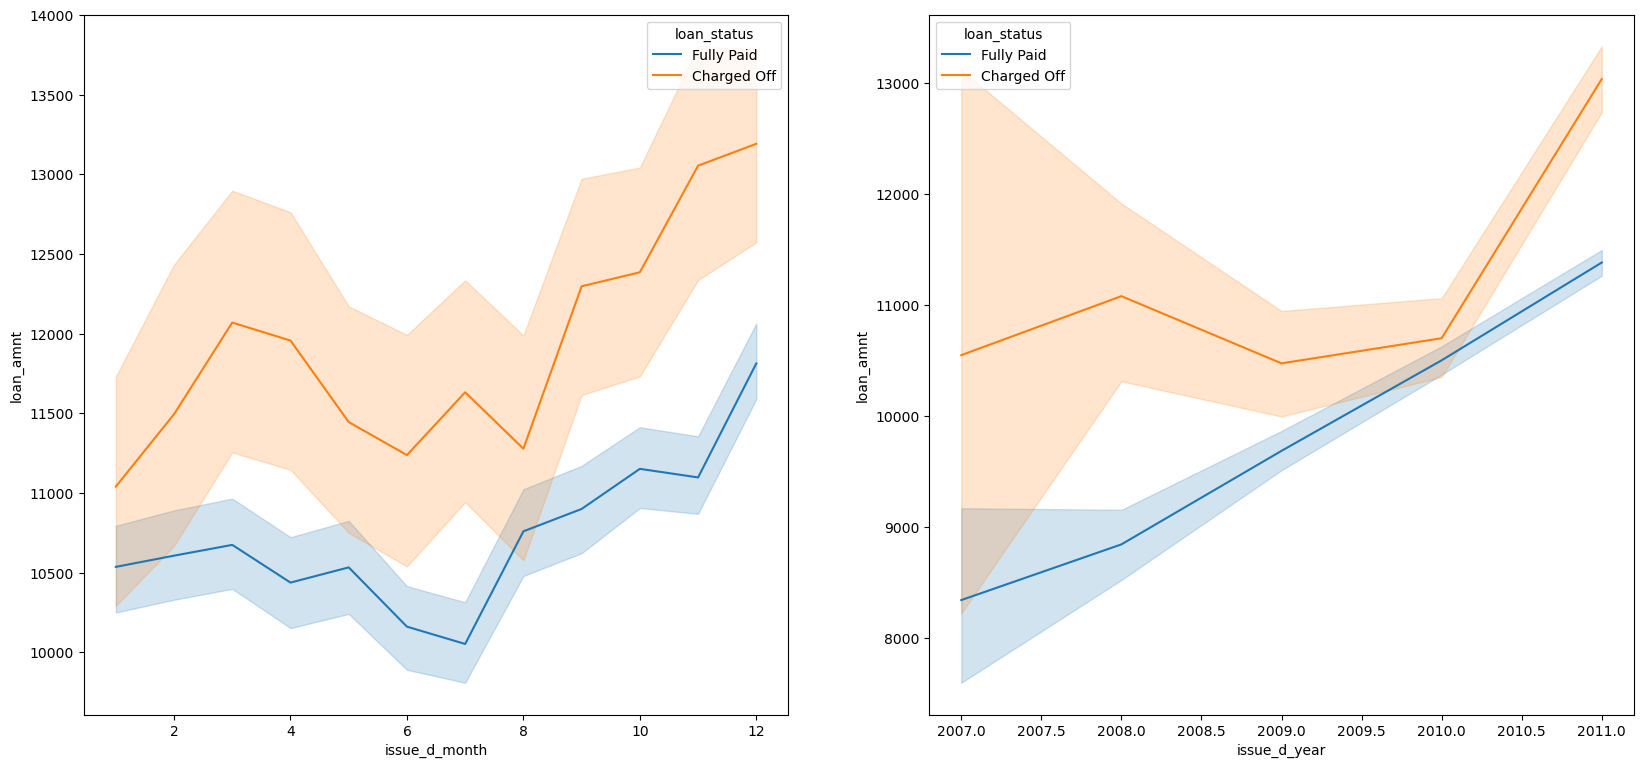

In [75]:
#Loan Amount vs Month issued and year Issued

plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =df,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(222)
sns.lineplot(data =df,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

#### Observations:
1. Loan defaults are max for loans taken in the month of **december**.
2. Loan defaults are showing an increasing trend in **2011**. Can be attributed to the fact that number of approved loans are increasing annually .
3. Tried the same plots with **earliest_cr_line_year and earliest_cr_line_month. Doesnt show any meaningful insights**.


### 11.2. loan amount VS grade 

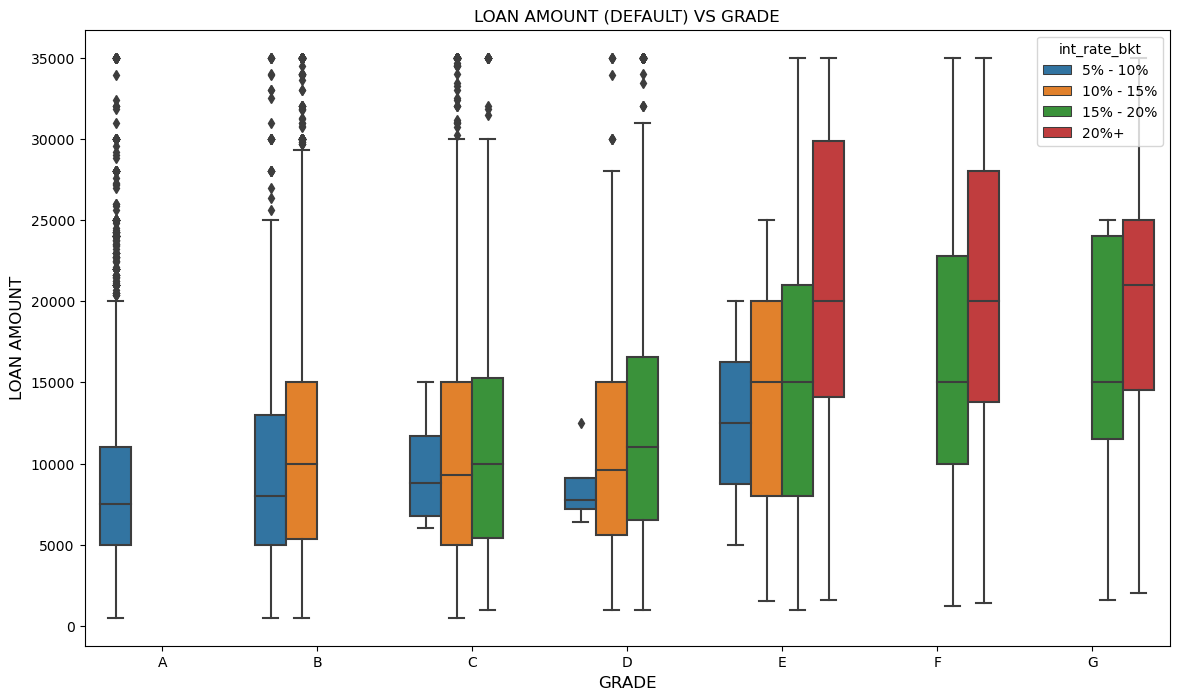

In [76]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt', 
            x='grade', 
            order=['A','B','C','D','E','F','G'],
            data=df,
                 hue='int_rate_bkt')

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 12)
viz.set_xlabel('GRADE', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE')
plt.show()

#### Observations :
Borrowers with higher **grade**,are offered loans at higher interest rate, and hence are more prone to default

### 11.3. Interest Rate VS Loan Amount

<Figure size 640x480 with 0 Axes>

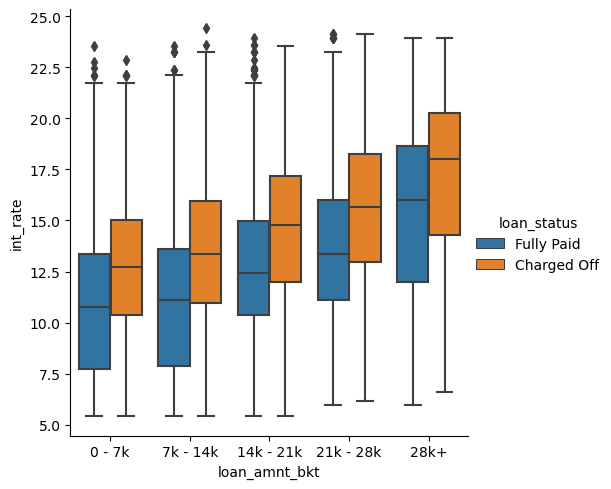

In [77]:
plt.tight_layout()
sns.catplot(data =df,y ='int_rate', x ='loan_amnt_bkt', hue ='loan_status',kind = 'box')

#### Observations:
The **interest rate** for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
This can be a pretty strong driving factor for loan defaulting.

### 11.4. Installment VS Loan Amount 

<Figure size 640x480 with 0 Axes>

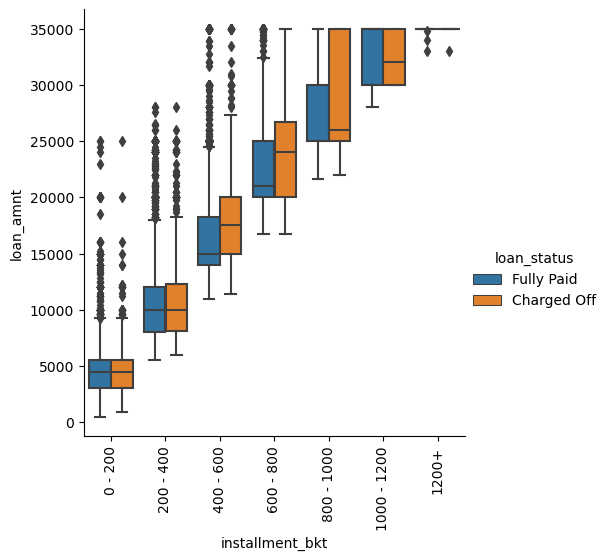

In [78]:
plt.tight_layout()
g=sns.catplot(data =df,y ='loan_amnt', x ='installment_bkt', hue ='loan_status',kind = 'box')
g.set_xticklabels(rotation=90)
plt.show()

#### Observations: 
We can clearly see that at **installment Range 800 to 1000** the default rate is high

### 11.5. Interest Rate VS Purpose

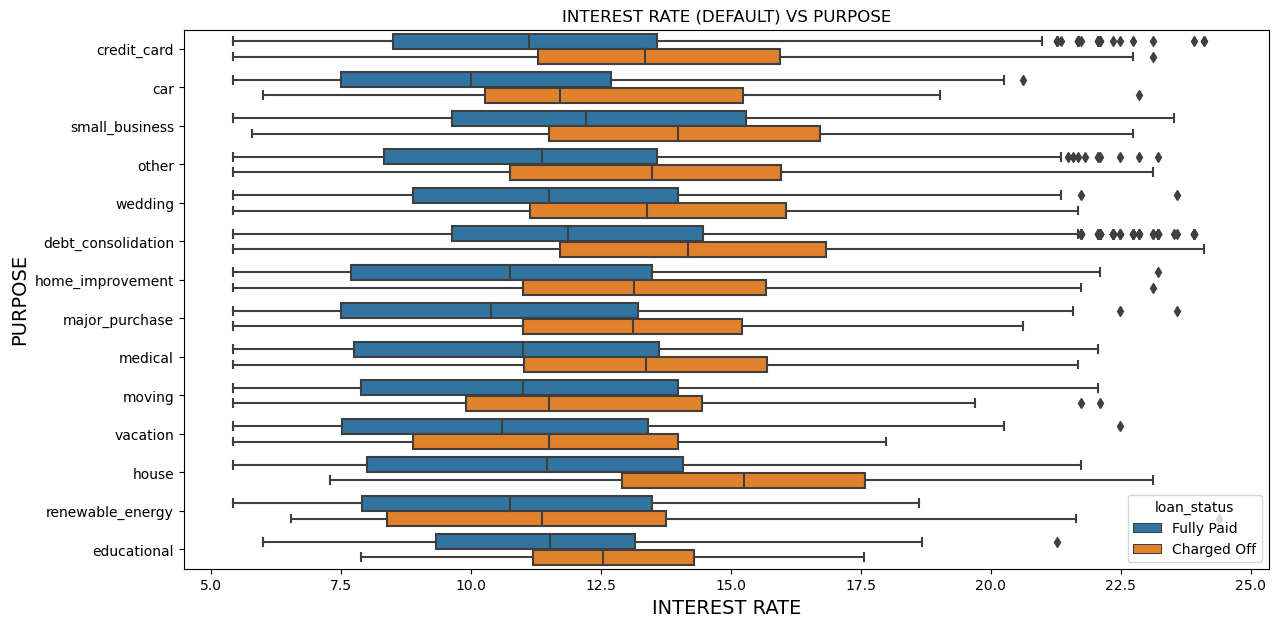

In [79]:
# Box plot for interest rate vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate', 
            y='purpose',
            data=df,
                 hue='loan_status')

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('INTEREST RATE (DEFAULT) VS PURPOSE')
plt.show()

#### Observations: 
We can clearly see that **interest rate is the primary driver** for default  among all the purposes

### 11.6. interest Rate VS Term

Text(0.5, 1.0, 'INTEREST_RATE (DEFAULT) VS TERM')

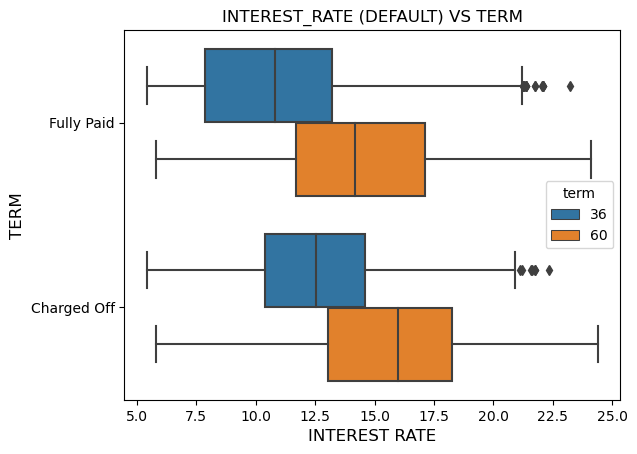

In [80]:
viz = sns.boxplot(x='int_rate', 
            y='loan_status',
            data=df,
                 hue='term')
# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 12)
viz.set_ylabel('TERM', fontsize = 12)
viz.set_title('INTEREST_RATE (DEFAULT) VS TERM')

#### Observations: 
1. Loans between **10% to 15%** interest rate are defaulted more when term is **36 months**.
2. Loans between **13% to 18%** interest rate are defaulted more when term is **60 months**.

#### 11.7. Correlation Matrix 

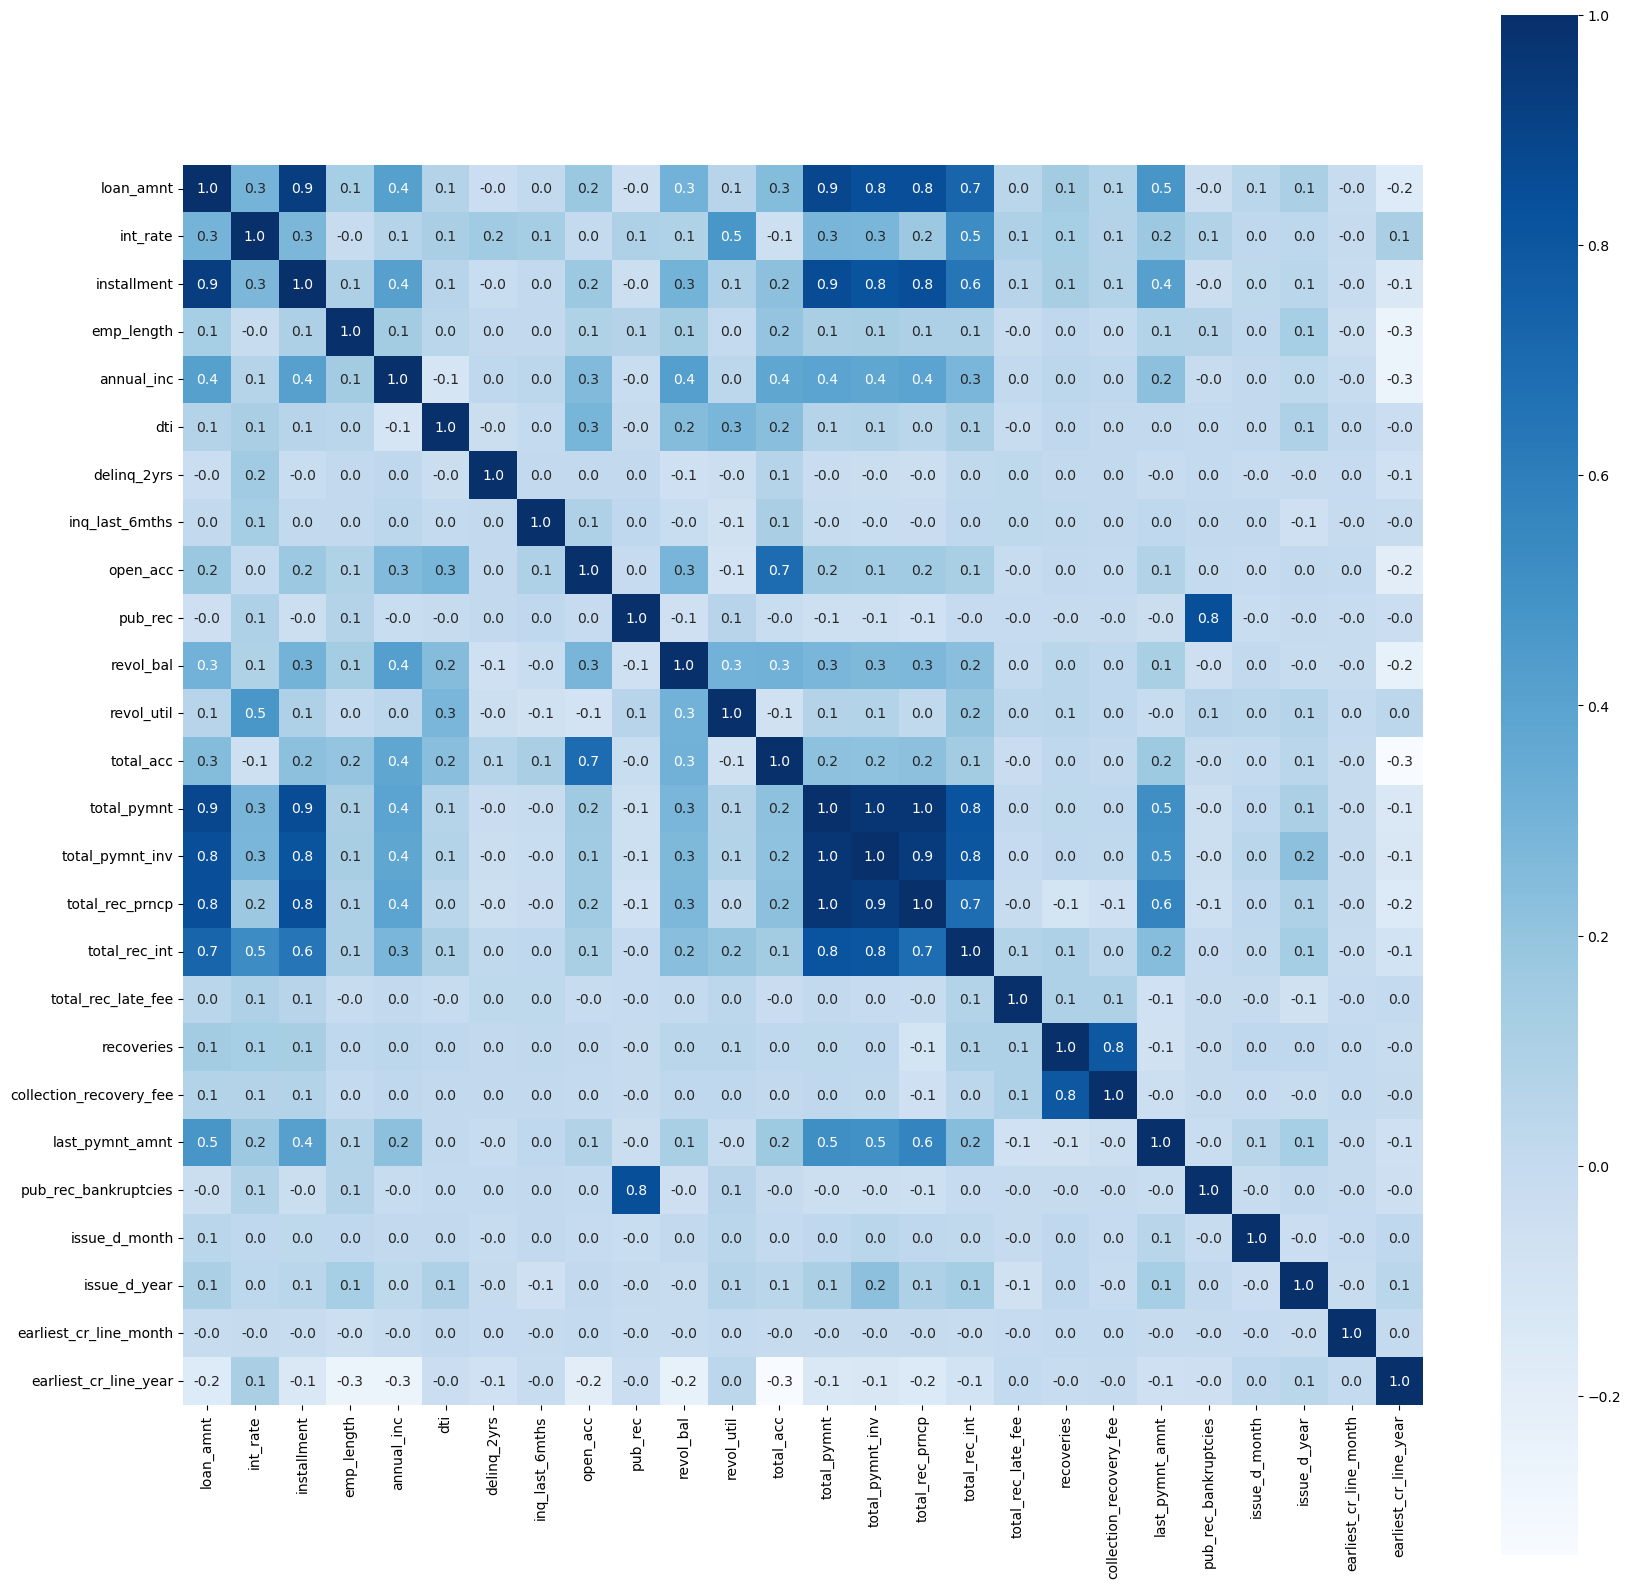

In [81]:
# Creating a correlation heatmap
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt = '.1f',square=True, cmap='Blues')
plt.show()

#### Observations:
1. **pub_rec and pub_rec_bankruptices are positively correlated**. We can use any of them as param for chargeoff.

We couldnt infer anything much w.r.t other params

### 11.8. Observations from MultiVariate Analysis
1. **Interest Rate** is a very huge factor for loan defaulting.
2. **Installment Range 800 to 1000** the default rate is high.
3. Loans between **10% to 15%** interest rate are defaulted more when term is **36 months** and Loans between **13% to 18%** interest rate are defaulted more when term is **60 months**.
4. pub_rec and pub_rec_bankruptices are positively correlated. We can use any of them as param for chargeoff.
5. Borrowers with **higher grade**,are offered loans at higher interest rate and hence are more prone to default.
6. There are more defaulters if the issue month is december and year is 2011.But we also see that the number of loans are also increasing gradually towards december and 2011. Hence this can be ignored.

# 12. Driving factors for loan default :
1. Bankruptcies 
2. Interest Rates
3. Installments in a higher range - more than 800 
4. Loans borrowed with small business as the purpose 
5. grade (above D) - But this is because of the pattern, borrowers with grade D and above are offered loans at high interest rate.

# 13. Recommendations :
1. Investors are adviced to keep track of bankruptcies while approving loans.
2. Setting Interest rates in a marginal bucket will reduce default rate.
3. Loans lent at a smaller installment payments are less prone to default.
4. Need to be more cautious while lending loans for the purpose of small business.